### Health Care Domain


##### This dataset contains drug performance metrics for 37 common conditions, so it can be used to compare and analyze the effectiveness, cost, and satisfaction of different drugs.
##### Column name	Description
##### 1.) Condition: The medical condition associated with the drug.
##### 2.) Drug: The name of the drug.
##### 3.) EaseOfUse: The ease of use of the drug based on customer reviews.
##### 4.) Effective: The effectiveness of the drug based on customer reviews.
##### 5.) Indication: The purpose of the drug.
##### 6.) Reviews: The number of reviews associated with the drug.
##### 7.) Satisfaction: The satisfaction level of the drug based on customer reviews.
##### 8.) Type: The type of drug (generic or brand).
##### 9.) Form: The form of the drug (e.g. tablet, capsule, etc.).
##### 10.) Price: The average price of the drug.

#### Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import pearsonr
import seaborn as sns
from scipy import stats


#### Step-0 Data collection

#### Here we are loading the dataset, diplay the data and summary of the dataset

In [ ]:
df=pd.read_csv("/content/na_drug.csv")
df

,Condition,Drug,EaseOfUse,Effective,Form,Indication,Price,Reviews,Satisfaction,Type
0,Acute Bacterial Sinusitis,Amoxicillin,3.852,3.656,Capsule,On Label,12.590,86.294,3.198,RX
1,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.470,3.290,Liquid (Drink),Off Label,287.370,43.000,2.590,RX
2,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.121,2.963,Tablet,On Label,70.609,267.286,2.249,RX
3,Acute Bacterial Sinusitis,Ampicillin,2.000,3.000,Capsule,On Label,12.590,1.000,1.000,RX
4,Acute Bacterial Sinusitis,Ampicillin,3.250,3.000,Tablet,On Label,125.240,15.000,3.000,RX
...,...,...,...,...,...,...,...,...,...,...
680,vulvovaginal candidiasis,Miconazole Nitrate,3.465,2.770,Cream,On Label,13.990,19.500,2.345,RX/OTC
681,vulvovaginal candidiasis,Miconazole-Skin Clnsr17,4.750,3.000,Cream,On Label,13.990,4.000,3.000,OTC
682,vulvovaginal candidiasis,Miconazole-Skin Clnsr17,4.000,1.000,Other,On Label,125.990,1.000,1.000,OTC
683,vulvovaginal candidiasis,Terconazole,3.525,3.047,Cream,On Label,68.990,20.000,2.717,RX


#### Here we are seeing the columns and its datatype

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Condition     685 non-null    object 
 1   Drug          685 non-null    object 
 2   EaseOfUse     685 non-null    float64
 3   Effective     685 non-null    float64
 4   Form          685 non-null    object 
 5   Indication    677 non-null    object 
 6   Price         685 non-null    float64
 7   Reviews       685 non-null    float64
 8   Satisfaction  685 non-null    float64
 9   Type          680 non-null    object 
dtypes: float64(5), object(5)
memory usage: 53.6+ KB


#### Here we are checking how many rows and columns do we have in the data

In [ ]:
df.shape

(685, 10)

#### Here we are checking do we have have null values

In [ ]:
df.isnull().sum()

,0
Condition,0
Drug,0
EaseOfUse,0
Effective,0
Form,0
Indication,8
Price,0
Reviews,0
Satisfaction,0
Type,5


#### step 1 Data Validation

In [ ]:
def lowercase(df):
    for col in df.select_dtypes("O"):
        df[col] = df[col].str.lower()

In [ ]:
lowercase(df)

In [ ]:
display(df[df.duplicated()])
print(f"Number of Rows Duplicated: {len(df[df.duplicated()])}")

,Condition,Drug,EaseOfUse,Effective,Form,Indication,Price,Reviews,Satisfaction,Type


Number of Rows Duplicated: 0


#### In this dataset we don't have duplicates

In [ ]:
# Iterate over the columns to check for object type and count unique values
for column in df.columns:
    print(f"Number of Unique Classes in Column '{column}':", df[column].nunique())
    print(df[column].value_counts())
    print()
    print("Unique Classes:")
    df[column].unique()

Number of Unique Classes in Column 'Condition': 37
Condition
hypertension                                 101
atopic dermatitis                             67
fever                                         64
gastroesophageal reflux disease               54
bacterial urinary tract infection             53
hypercholesterolemia                          32
hemorrhoids                                   31
gout                                          31
endometriosis                                 19
pharyngitis due to streptococcus pyogenes     19
back pain                                     17
diverticulitis of gastrointestinal tract      16
bacterial conjunctivitis                      16
flatulence                                    15
depression                                    15
edema                                         15
prevention of cerebrovascular accident        14
acute bacterial sinusitis                     14
vertigo                                       13
fibromya

##### Here we are checking unique values for various columns
##### condition : we have unique values 37
##### drug : we have unique values 480
##### EaseOfUse : we have unique values 31
##### Effective : we have unique values 36
##### form : we have unique values 6 like - Tablet, Liquid (Drink), Cream, Capsule, Other
##### indication : we have unique values 2 like - On Label, Off Label
##### Price: we have unique values 301
##### Reviews : we have unique values 282
##### Satisfaction : we have unique values 38
##### type : we have unique values 3  like - RX, OTC, RX/OTC

#### Here we are rounding off to 1 decimal for effective column as we will be giving the rating upto 1 decimal place

In [ ]:
df['Effective'] = df['Effective'].round(1)
df['Satisfaction'] = df['Satisfaction'].round(1)
df['EaseOfUse'] = df['EaseOfUse'].round(1)
df['Reviews'] = df['Reviews'].round()
df['Price']=df['Price'].round()

In [ ]:
df

,Condition,Drug,EaseOfUse,Effective,Form,Indication,Price,Reviews,Satisfaction,Type
0,acute bacterial sinusitis,amoxicillin,3.900,3.700,capsule,on label,13.000,86.000,3.200,rx
1,acute bacterial sinusitis,amoxicillin-pot clavulanate,3.500,3.300,liquid (drink),off label,287.000,43.000,2.600,rx
2,acute bacterial sinusitis,amoxicillin-pot clavulanate,3.100,3.000,tablet,on label,71.000,267.000,2.200,rx
3,acute bacterial sinusitis,ampicillin,2.000,3.000,capsule,on label,13.000,1.000,1.000,rx
4,acute bacterial sinusitis,ampicillin,3.200,3.000,tablet,on label,125.000,15.000,3.000,rx
...,...,...,...,...,...,...,...,...,...,...
680,vulvovaginal candidiasis,miconazole nitrate,3.500,2.800,cream,on label,14.000,20.000,2.300,rx/otc
681,vulvovaginal candidiasis,miconazole-skin clnsr17,4.800,3.000,cream,on label,14.000,4.000,3.000,otc
682,vulvovaginal candidiasis,miconazole-skin clnsr17,4.000,1.000,other,on label,126.000,1.000,1.000,otc
683,vulvovaginal candidiasis,terconazole,3.500,3.000,cream,on label,69.000,20.000,2.700,rx


In [ ]:
df

,Condition,Drug,EaseOfUse,Effective,Form,Indication,Price,Reviews,Satisfaction,Type
0,acute bacterial sinusitis,amoxicillin,3.900,3.700,capsule,on label,13.000,86.000,3.200,rx
1,acute bacterial sinusitis,amoxicillin-pot clavulanate,3.500,3.300,liquid (drink),off label,287.000,43.000,2.600,rx
2,acute bacterial sinusitis,amoxicillin-pot clavulanate,3.100,3.000,tablet,on label,71.000,267.000,2.200,rx
3,acute bacterial sinusitis,ampicillin,2.000,3.000,capsule,on label,13.000,1.000,1.000,rx
4,acute bacterial sinusitis,ampicillin,3.200,3.000,tablet,on label,125.000,15.000,3.000,rx
...,...,...,...,...,...,...,...,...,...,...
680,vulvovaginal candidiasis,miconazole nitrate,3.500,2.800,cream,on label,14.000,20.000,2.300,rx/otc
681,vulvovaginal candidiasis,miconazole-skin clnsr17,4.800,3.000,cream,on label,14.000,4.000,3.000,otc
682,vulvovaginal candidiasis,miconazole-skin clnsr17,4.000,1.000,other,on label,126.000,1.000,1.000,otc
683,vulvovaginal candidiasis,terconazole,3.500,3.000,cream,on label,69.000,20.000,2.700,rx


#### Here we are adding the column "Effectiveness_category" in order to use for eda purpose and understand the data properly

In [ ]:
def categorize_effectiveness(value):
    if value <= 1.5:
        return "Uneffective"
    elif value > 1.5 and value <3:
        return "Partially Effective"
    elif value >=3 and value <4:
        return "Effective"
    elif value >=4 and value <= 5:
        return "Very Effective"

df['Effectiveness_Category'] = df['Effective'].apply(categorize_effectiveness)

In [ ]:
df

,Condition,Drug,EaseOfUse,Effective,Form,Indication,Price,Reviews,Satisfaction,Type,Effectiveness_Category
0,acute bacterial sinusitis,amoxicillin,3.900,3.700,capsule,on label,13.000,86.000,3.200,rx,Effective
1,acute bacterial sinusitis,amoxicillin-pot clavulanate,3.500,3.300,liquid (drink),off label,287.000,43.000,2.600,rx,Effective
2,acute bacterial sinusitis,amoxicillin-pot clavulanate,3.100,3.000,tablet,on label,71.000,267.000,2.200,rx,Effective
3,acute bacterial sinusitis,ampicillin,2.000,3.000,capsule,on label,13.000,1.000,1.000,rx,Effective
4,acute bacterial sinusitis,ampicillin,3.200,3.000,tablet,on label,125.000,15.000,3.000,rx,Effective
...,...,...,...,...,...,...,...,...,...,...,...
680,vulvovaginal candidiasis,miconazole nitrate,3.500,2.800,cream,on label,14.000,20.000,2.300,rx/otc,Partially Effective
681,vulvovaginal candidiasis,miconazole-skin clnsr17,4.800,3.000,cream,on label,14.000,4.000,3.000,otc,Effective
682,vulvovaginal candidiasis,miconazole-skin clnsr17,4.000,1.000,other,on label,126.000,1.000,1.000,otc,Uneffective
683,vulvovaginal candidiasis,terconazole,3.500,3.000,cream,on label,69.000,20.000,2.700,rx,Effective


### Step 2 EDA Analysis

In [ ]:
pip install simple_colors

#### Univariate Analysis
##### Definition: works on one variable at a time.

##### Purpose: to know the distribution, central tendency, and variability of a single variable.

##### Techniques:

##### For numerical data:

##### Measure of central tendency (mean, median, mode).
##### Measure of dispersion (range, variance, standard deviation).
##### Visualization:

##### Histograms, box plots, line charts.
##### For categorical data:

##### Frequency counts and percentages.
##### Visualization:

##### Bar charts, pie charts.

In [ ]:
Cat_columns = df.select_dtypes(include='object')
Num_columns = df.select_dtypes(exclude='object')

##### Here we are doing visualization for categorical data by using Horizontal Bar Chart

Column: Condition
Missing Values Count: 0
Missing Values Percentage: 0.0


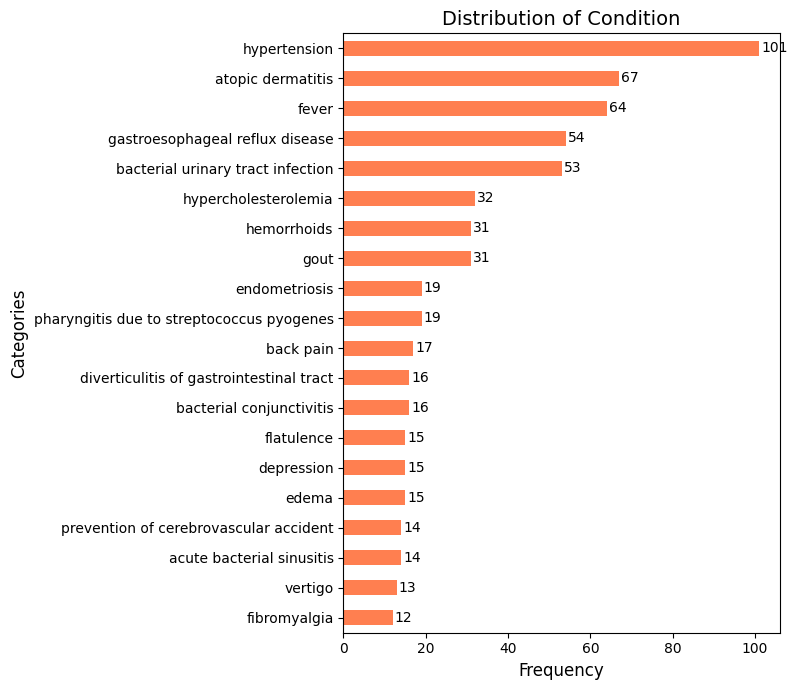

Column: Drug
Missing Values Count: 0
Missing Values Percentage: 0.0


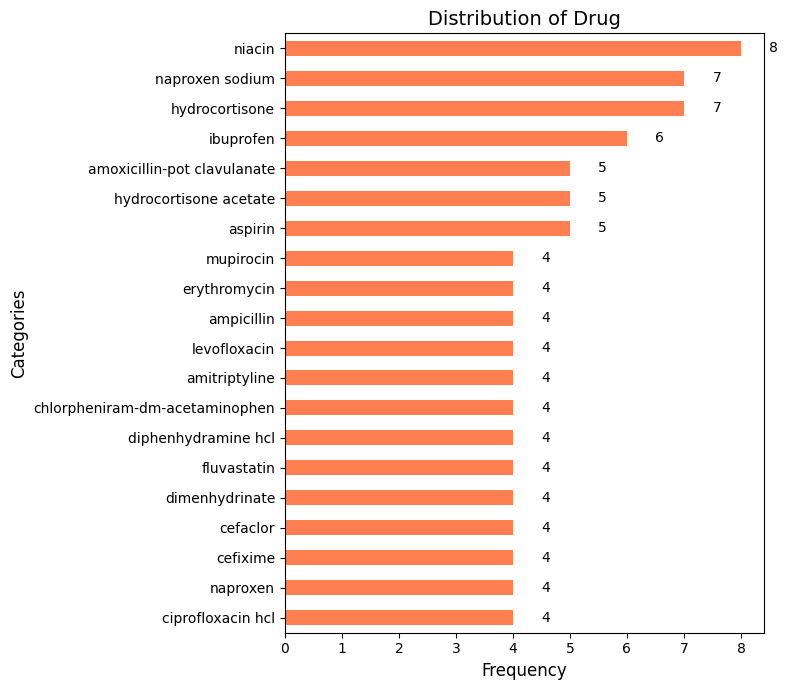

Column: Form
Missing Values Count: 0
Missing Values Percentage: 0.0


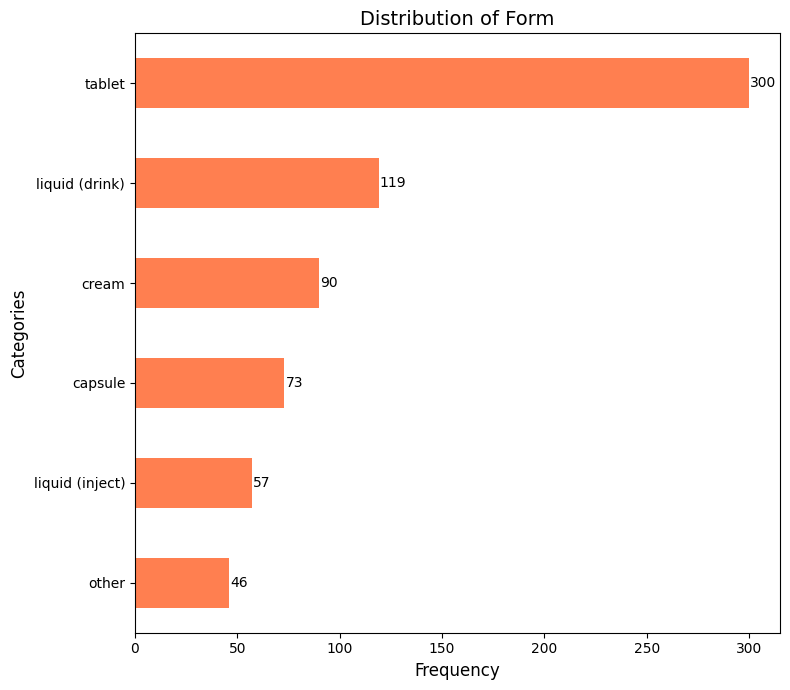

Column: Indication
Missing Values Count: 8
Missing Values Percentage: 1.17


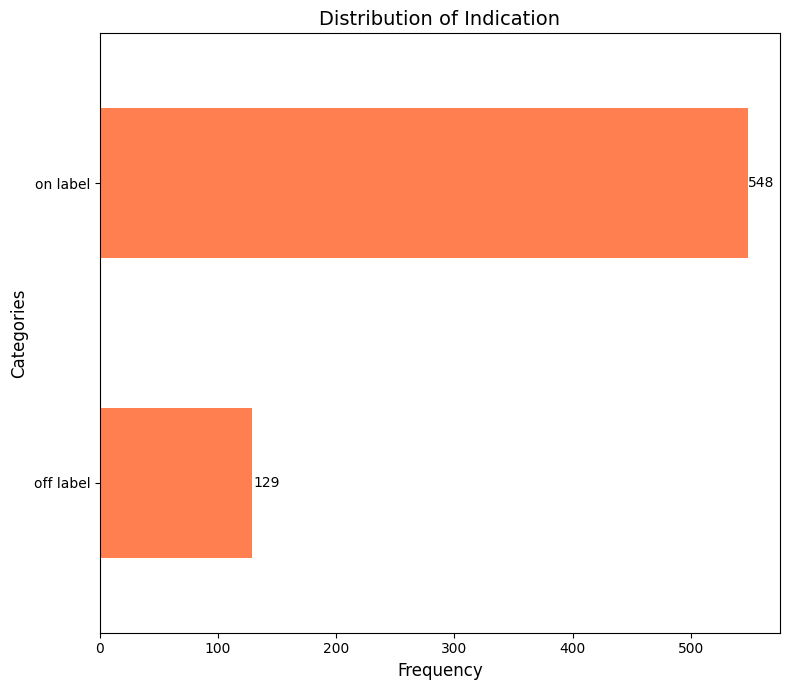

Column: Type
Missing Values Count: 5
Missing Values Percentage: 0.73


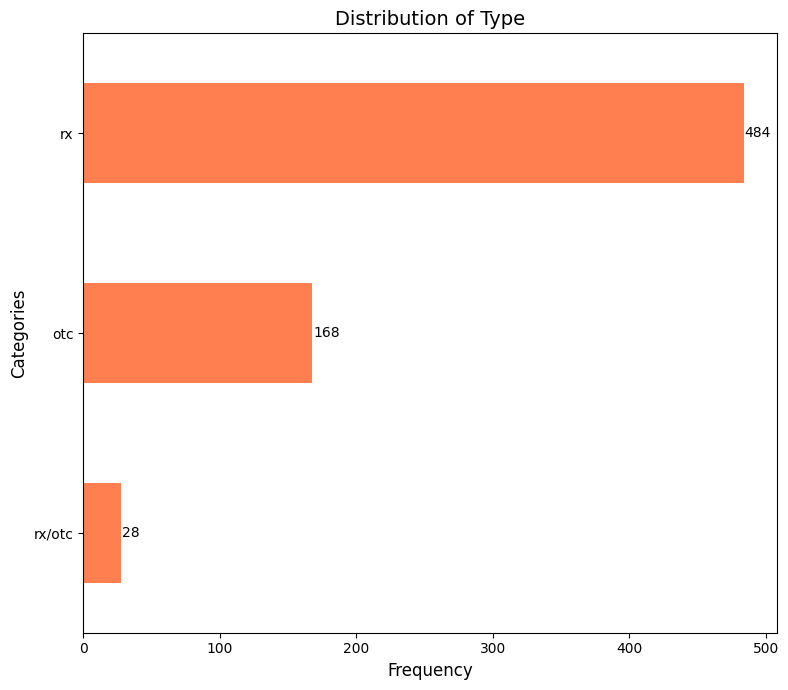

Column: Effectiveness_Category
Missing Values Count: 0
Missing Values Percentage: 0.0


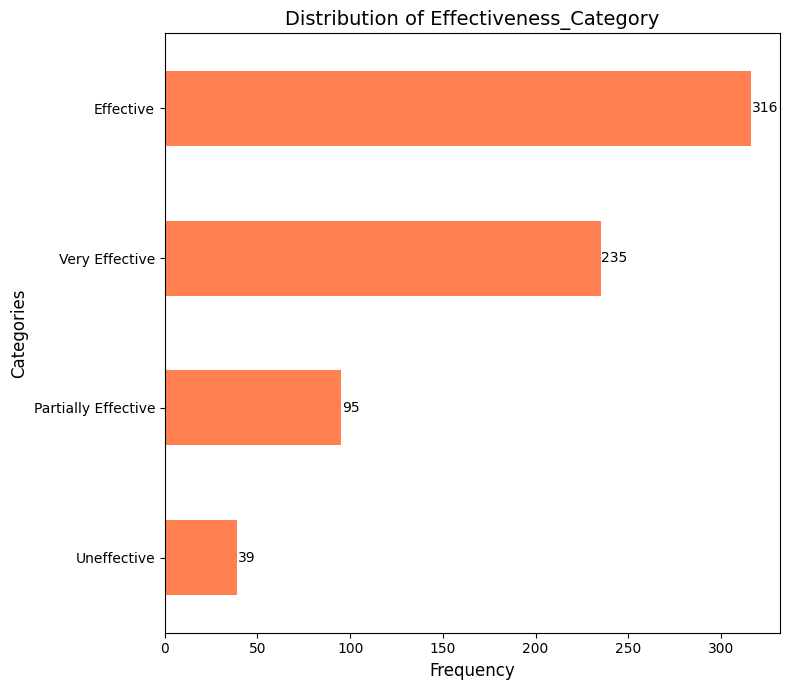

In [ ]:
def univariate_cat(d, var):
    # Check for missing values and print information
    print("Column:" , col)
    print("Missing Values Count:", df[col].isnull().sum())
    print("Missing Values Percentage:", round(df[col].isnull().mean() * 100, 2))
    value_counts = d[var].value_counts().head(20).sort_values(ascending=True)
    ax = value_counts.plot(kind='barh', color='coral', figsize=(8, 7))
    for i, v in enumerate(value_counts.values):
        ax.text(v + 0.5, i, str(v), color='black', va='center', fontsize=10)
    plt.title(f'Distribution of {var}', fontsize=14)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Categories', fontsize=12)
    plt.tight_layout()
    plt.show()
for col in Cat_columns:
    univariate_cat(df, col)


##### The insights which are derived from above visualization i.e univariate analysis for categorical columns are
##### Condition : for hypertension(i.e high blood pressure measured in mm hg) the count is 101 is high and fibromyalgia(body pains every where) is low i.e 12 on top 20
##### Drug : for niacin(i.e vitamin B3) the count is 8 and ciprofloxacin hcl(i.e antibiotic used to treat a variety of bacterial infections)
##### Form : for tablet the count is 300 and liquid(inject) the count is 57 and others is 46
##### Indication : On-label means using a medicine exactly as the FDA(Food and Drug Administration) approved it, for the condition it was tested and approved for , Off-label drug use means using a medicine for a purpose other than what the FDA(Food and Drug Administration) originally approved it for.
##### Type: Rx Type Drugs are commonly known as drugs that need medical prescription , OTC Type Drugs are commonly known as over the counter medicine where you can purchase without a subscription.
##### Effectiveness_Category : here most of the drugs are effective.

##### mean : sum of all the values present in the feature divided by number of values in the feature is known as mean

##### median : The median is the middle value when the data is arranged in an order. If there are even number of values, the median is the average of the two middle values

##### mode : to know most repeated values in the feature

##### range : The range is the difference between the maximum and minimum values

##### variance : used to calculate the average squared deviation of each data point from the mean

##### standard deviation : It measures the average distance of each data point from the mean

In [ ]:
Num_columns.describe()

,EaseOfUse,Effective,Price,Reviews,Satisfaction
count,685.000,685.000,685.000,685.000,685.000
mean,3.920,3.524,174.194,82.628,3.195
std,0.894,0.954,667.738,273.287,1.031
min,1.000,1.000,4.000,1.000,1.000
25%,3.600,3.000,15.000,3.000,2.600
50%,4.000,3.600,50.000,10.000,3.200
75%,4.500,4.100,146.000,57.000,3.900
max,5.000,5.000,10362.000,4647.000,5.000


##### Here we are doing visualization for numerical data by using stacked column chart

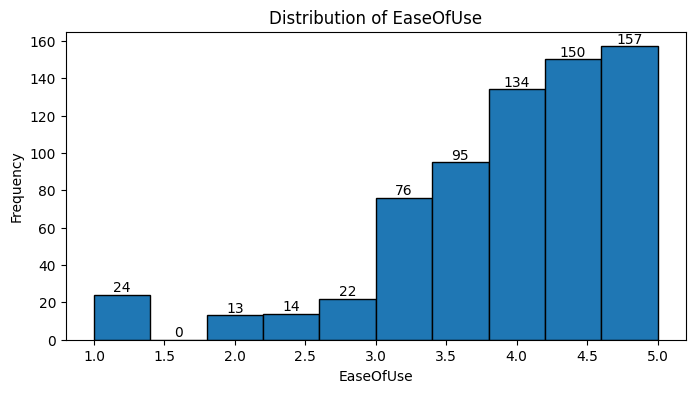

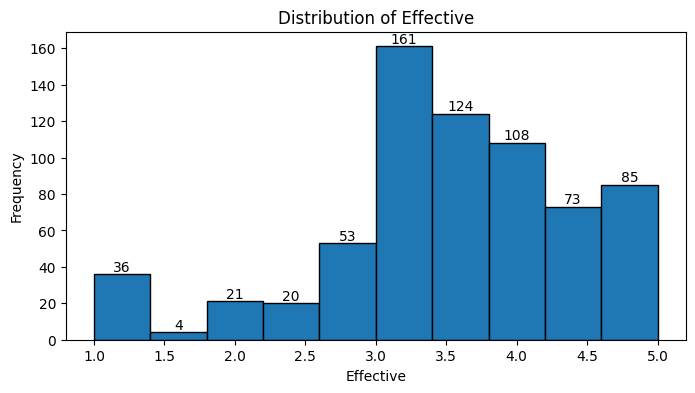

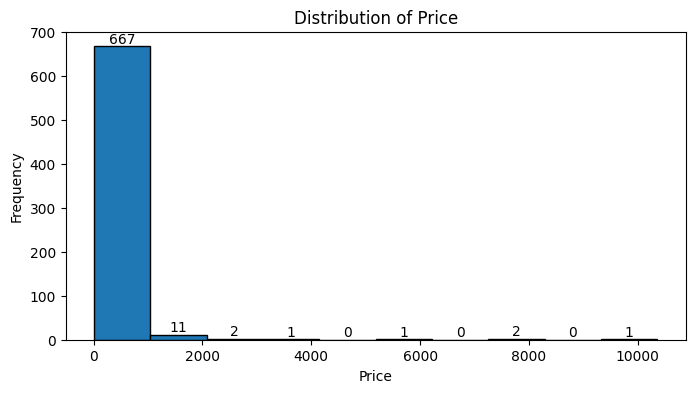

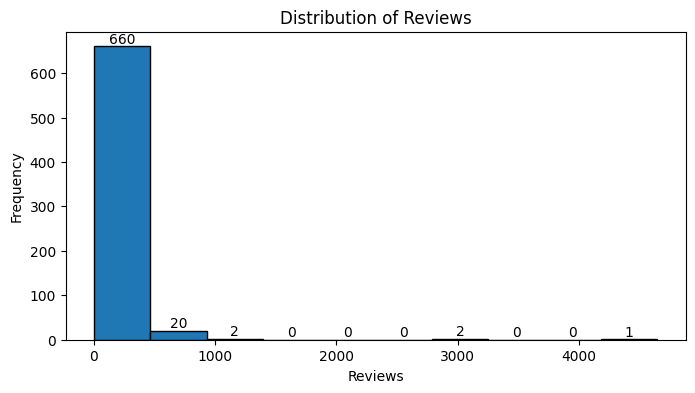

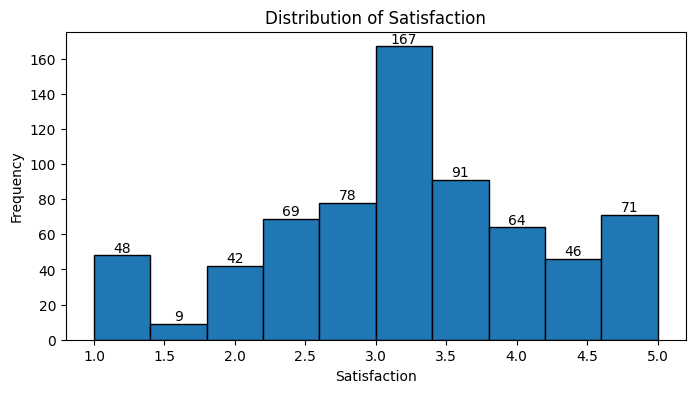

In [ ]:
def univariate_num(df, var):
    plt.figure(figsize=(8,4))
    n, bins, patches = plt.hist(df[var], bins=10, edgecolor='black')
    for i in range(len(patches)):
        height = patches[i].get_height()
        plt.text(patches[i].get_x() + patches[i].get_width() / 2, height + 0.1, str(int(height)),
                 ha='center', va='bottom', fontsize=10)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var}')
    plt.show()
for var in Num_columns.columns:
    univariate_num(df, var)

##### The insights which are derived from above visualization i.e univariate analysis for numerical columns are
##### EaseOfUse : here we see that every drug can be used easy and effictive where as few drugs need to be investigated
##### Effective : here we most of the drugs are effective and giving positive effects
##### Price : here we can say that the cost of the drug on the average we have the range between 4 to 1000 max
##### Reviews : here we say most of them have given the review for the drug they have purchased.
##### Satisfaction : here satifaction is morderate

### Bivariate Analysis
##### Bivariate used for the analysis of two variables to know the relationship between them.

##### Purpose: To determine the type of relationship (e.g., linear, non-linear).

##### Types of Bivariate Analysis

##### 1.Numerical vs. Numerical
##### check relationships between two continuous variables.

##### 2.Categorical vs. Categorical
##### check relationships between two categorical variables.

##### 3.Numerical vs. Categorical
##### check the relationship between a continuous variable and a categorical variable.
##### Visualization Tools for Bivariate Analysis

##### Scatter Plot: For Numerical vs. Numerical.
##### Heatmap: Correlation visualization for multiple pairs of numerical variables.
##### Bar Chart: For categorical relationships.
##### Box Plot: To compare distributions.

### Numerical vs Numerical

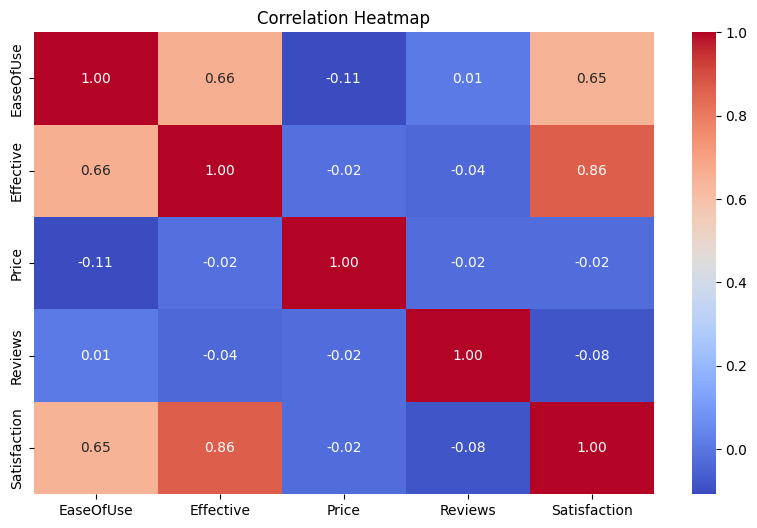

In [ ]:
def bivariate_nn(df):
    # Correlation Heatmap for numerical data
    corr = df.select_dtypes(include=['float64']).corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()
bivariate_nn(df)

#### The insights which are derived from above visualization i.e bivariate analysis for numerical columns vs numerical columns are
##### Here we see that there is strong postive relation between EaseOfUse and Satisfaction
##### Here we see that there is strong postive relation between EaseOfUse and Effective
##### Here we see that there is weak and poor relation with other columns for price
##### Here we see that there is no minimal relation with other columns for reviews

### Categorical vs Numerical

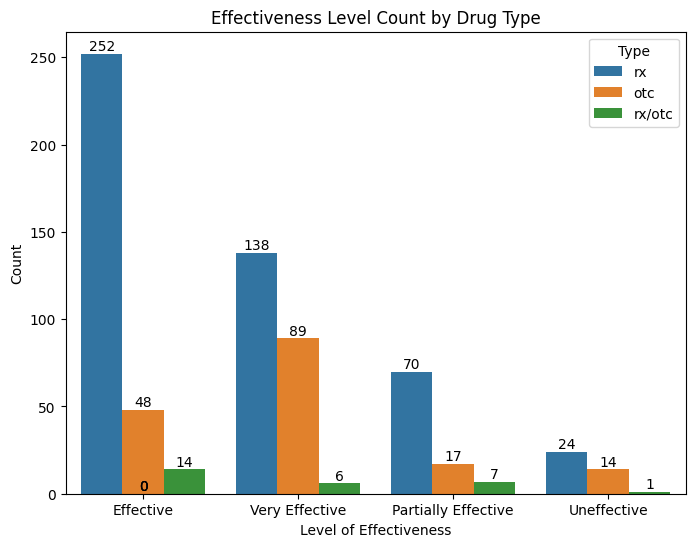

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Effectiveness_Category', hue='Type', data=df)
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax.text(x, height + 0.1, f'{int(height)}', ha='center', va='bottom', fontsize=10)
plt.xlabel('Level of Effectiveness')
plt.ylabel('Count')
plt.title('Effectiveness Level Count by Drug Type')
plt.show()

#### The insights which are derived from above visualization i.e bivariate analysis for categorical columns vs numerical columns are
##### we see that most of the drug which are prescribed by the doctor is effective (i.e RX) . we should not trust more the OTC drugs

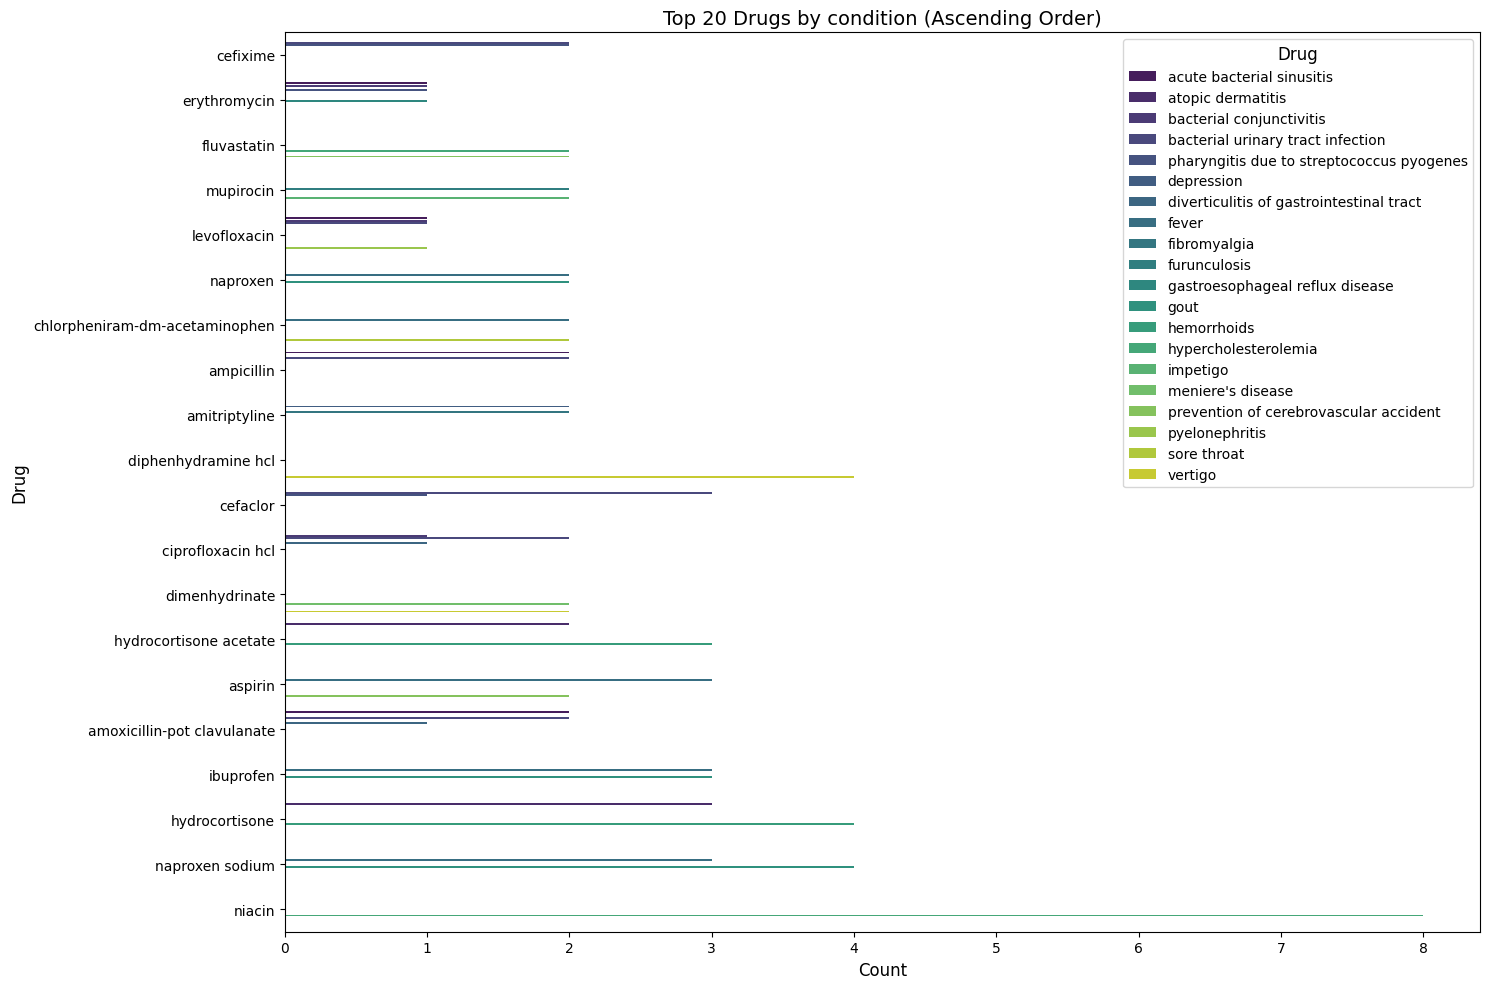

In [ ]:
top_drugs = df['Drug'].value_counts().head(20).index
filtered_df = df[df['Drug'].isin(top_drugs)]
ascending_order = (
    filtered_df['Drug']
    .value_counts()
    .sort_values(ascending=True)
    .index
)

plt.figure(figsize=(15, 10))
sns.countplot(y='Drug', hue='Condition', data=filtered_df, order=ascending_order, palette='viridis')
plt.title('Top 20 Drugs by condition (Ascending Order)', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Drug', fontsize=12)
plt.legend(title='Drug', fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()


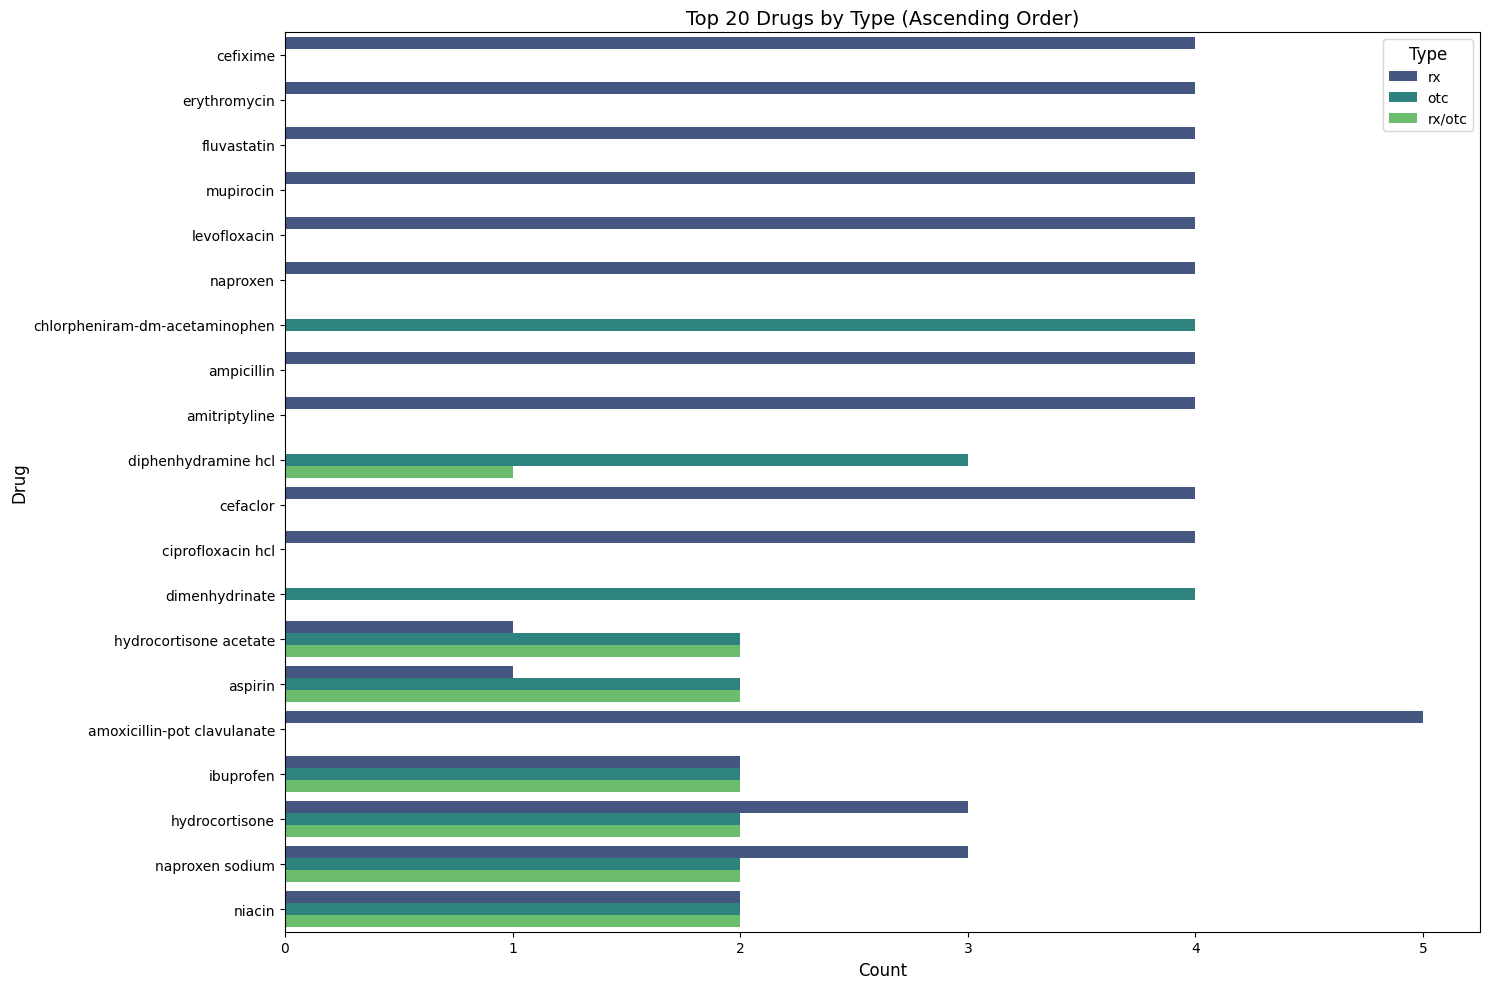

In [ ]:
top_drugs = df['Drug'].value_counts().head(20).index
filtered_df = df[df['Drug'].isin(top_drugs)]
ascending_order = (
    filtered_df['Drug']
    .value_counts()
    .sort_values(ascending=True)
    .index
)

plt.figure(figsize=(15, 10))
sns.countplot(y='Drug', hue='Type', data=filtered_df, order=ascending_order, palette='viridis')
plt.title('Top 20 Drugs by Type (Ascending Order)', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Drug', fontsize=12)
plt.legend(title='Type', fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()


#### The insights which are derived from above visualization i.e bivariate analysis for categorical columns vs numerical columns are:
##### here we see that most of the drugs need to prescribe by doctor then only the drugs need to be take in.

relation(form,ease),(drug,price),(Condition vs. Form),(e.g., Type vs. Price).

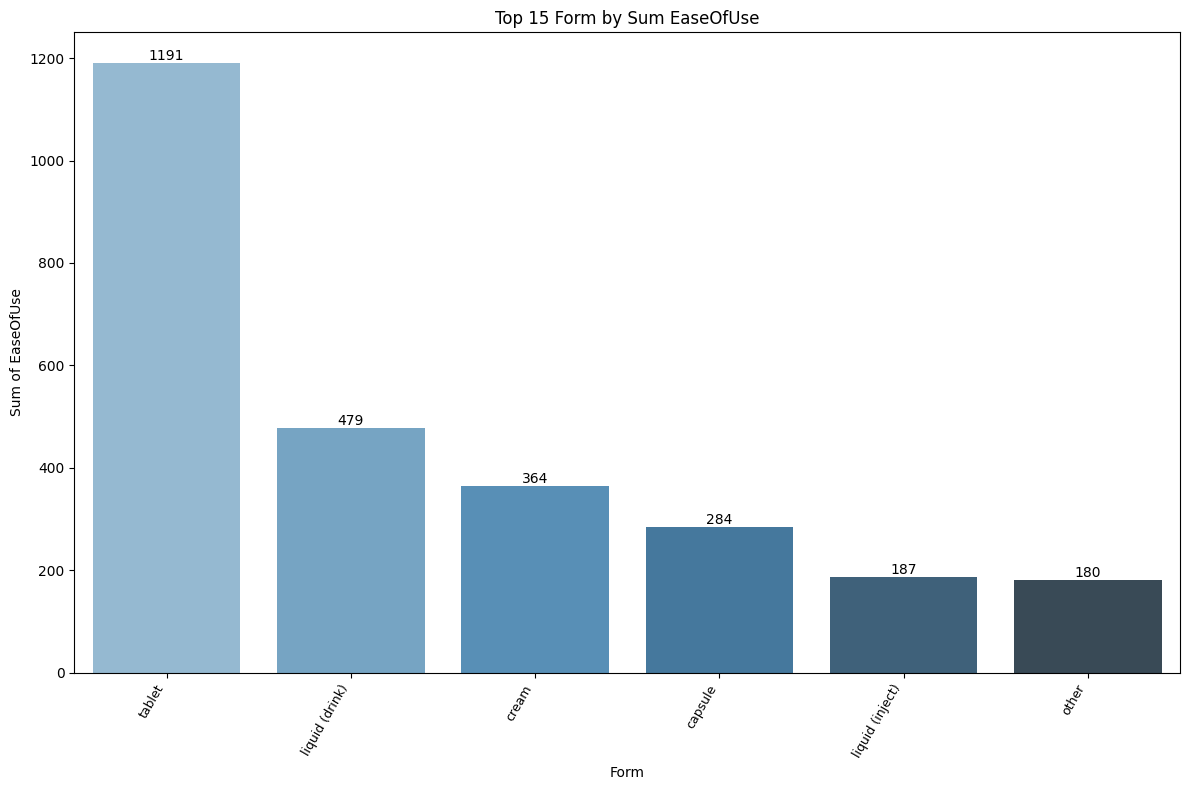

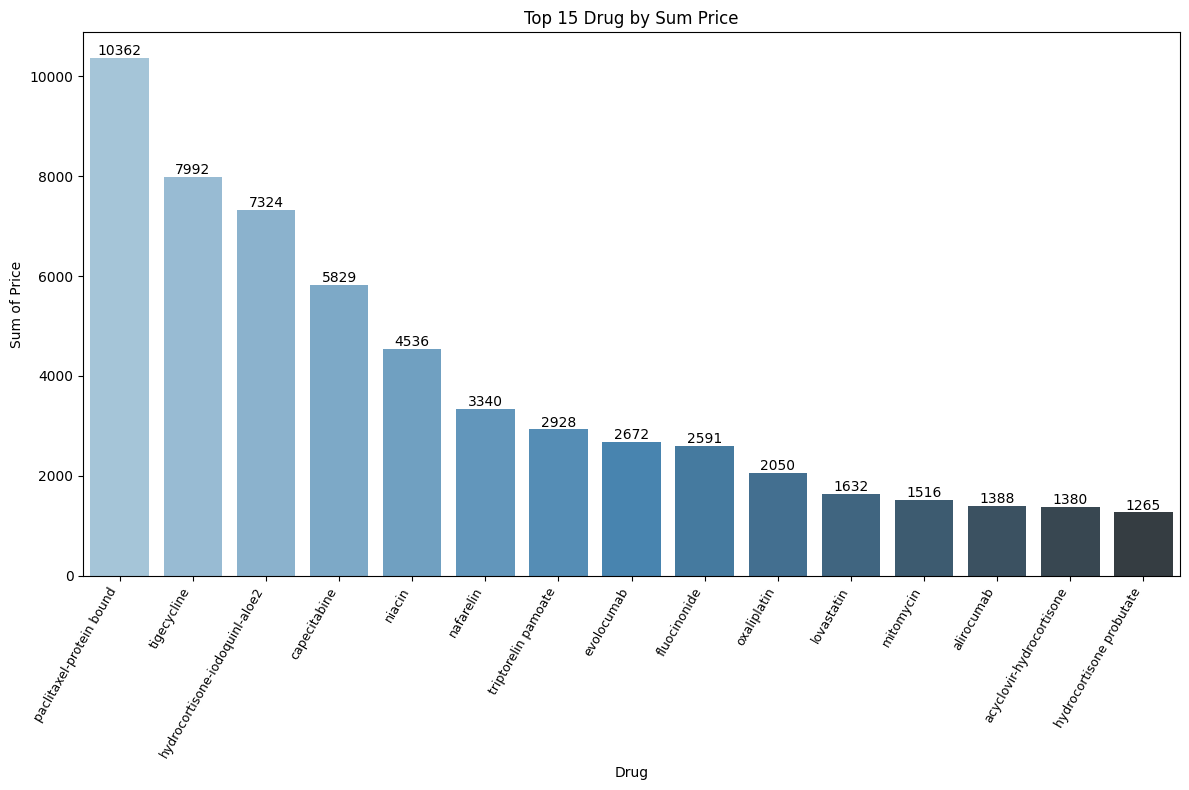

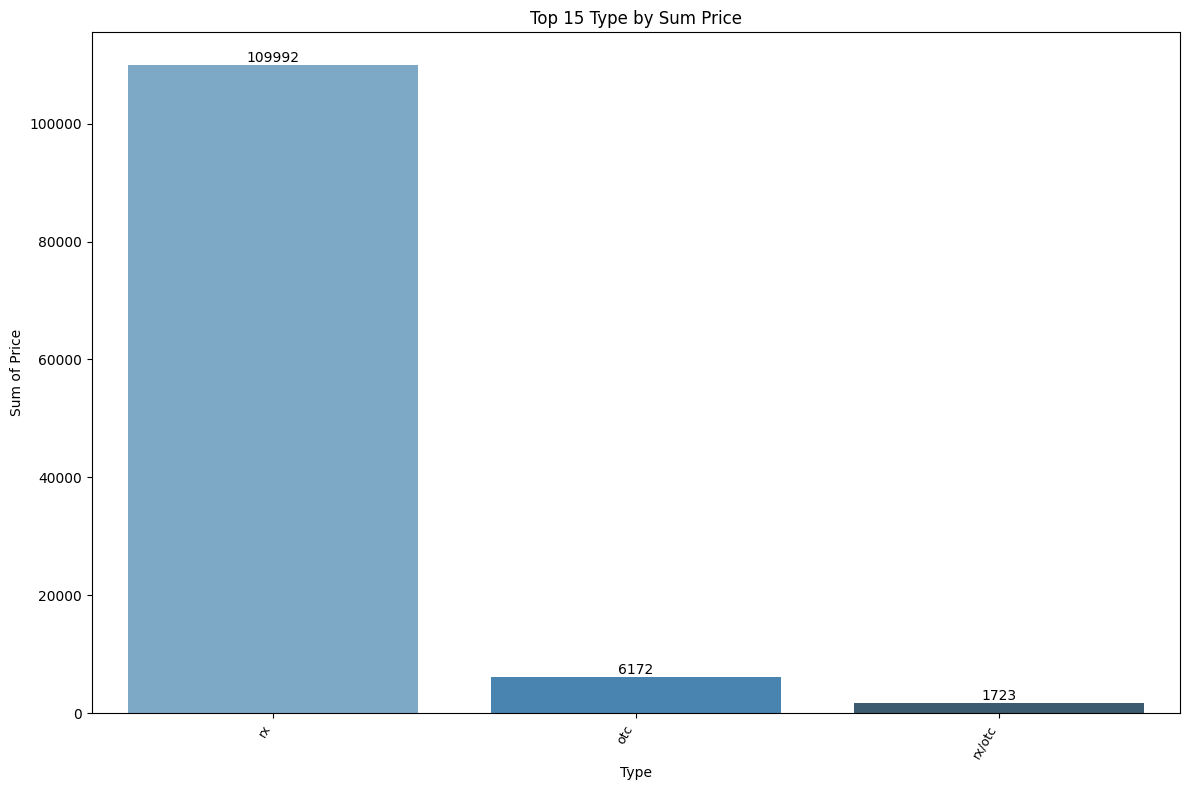

In [ ]:
relationships = [
    ('Form', 'EaseOfUse'),
    ('Drug', 'Price'),
    ('Type', 'Price')
]

for cat_col, num_col in relationships:
    agg_data = df.groupby(cat_col)[num_col].sum().reset_index()
    top_categories = agg_data.nlargest(15, num_col)
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=top_categories, x=cat_col, y=num_col, palette="Blues_d")
    for p in ax.patches:
        ax.annotate(f'{int(round(p.get_height()))}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black',
                    xytext=(0, 5), textcoords='offset points')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right', fontsize=9)
    plt.title(f"Top 15 {cat_col} by Sum {num_col}")
    plt.ylabel(f"Sum of {num_col}")
    plt.xlabel(cat_col)
    plt.tight_layout()
    plt.show()


#### The insights which are derived from above visualization i.e bivariate analysis for categorical columns vs numerical columns are:
##### here we see that in the forms most are tablets to recovery from health issues and liquid(drink)
##### here we see that in the drugs the most of them are using praclitaxel-protein Bound (used for certain types of cancer)and very less is hydrocortisone probutate(treating inflammatory skin conditions)
##### here we see that most of the type of drugs purchase is rx which is prescribed by the docotor.

### Categorical vs Categorical

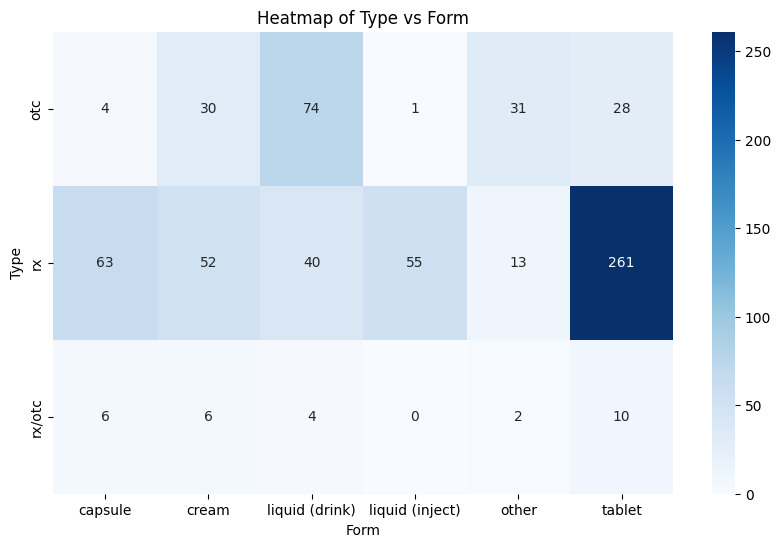

In [ ]:
def bivariate_cc(data, cat_col1, cat_col2):
    contingency_table = pd.crosstab(df[cat_col1], df[cat_col2])
    plt.figure(figsize=(10, 6))
    sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
    plt.title(f'Heatmap of {cat_col1} vs {cat_col2}')
    plt.xlabel(cat_col2)
    plt.ylabel(cat_col1)
    plt.show()
bivariate_cc(df, cat_col1='Type', cat_col2='Form')

#### The insights which are derived from above visualization i.e bivariate analysis for categorical columns vs categorical columns are
##### we see that mostly the doctors are prescribing tables according to conditions they are suffering

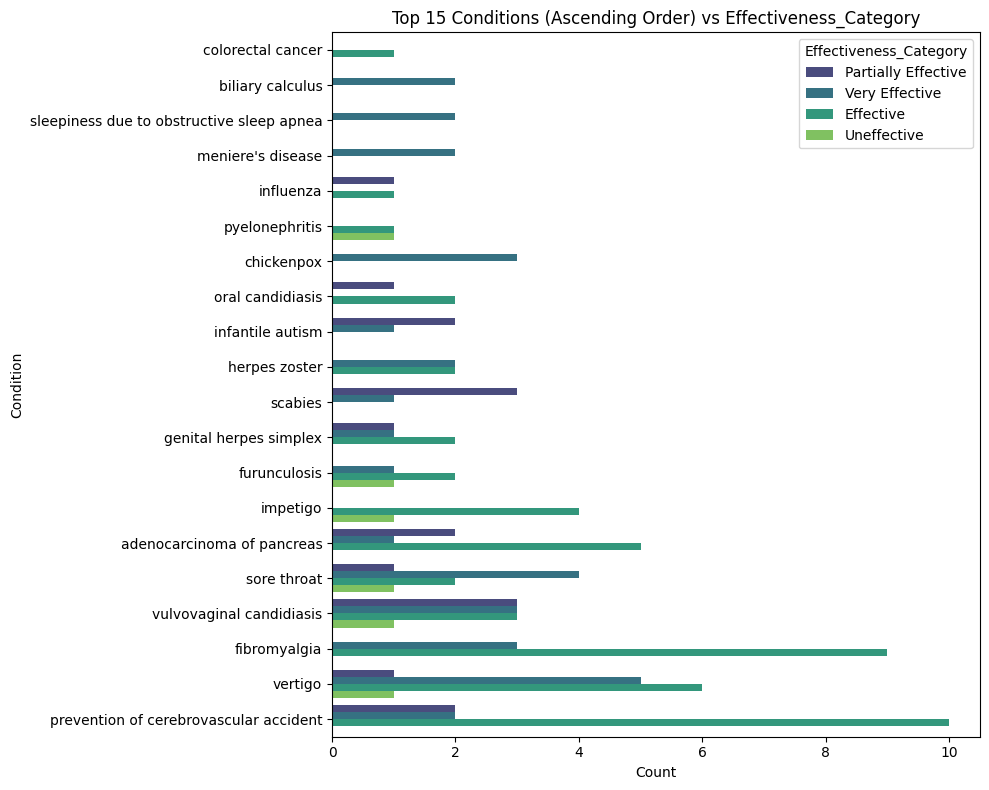

In [ ]:
# Calculate the top 15 conditions in ascending order by frequency
top_conditions = df['Condition'].value_counts().nsmallest(20).index

# Filter the data to include only the top 15 conditions
filtered_data = df[df['Condition'].isin(top_conditions)]

# Plot the countplot as a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.countplot(data=filtered_data, y='Condition', hue='Effectiveness_Category', palette='viridis', order=top_conditions)
plt.title('Top 15 Conditions (Ascending Order) vs Effectiveness_Category')
plt.xlabel('Count')
plt.ylabel('Condition')
plt.tight_layout()
plt.show()


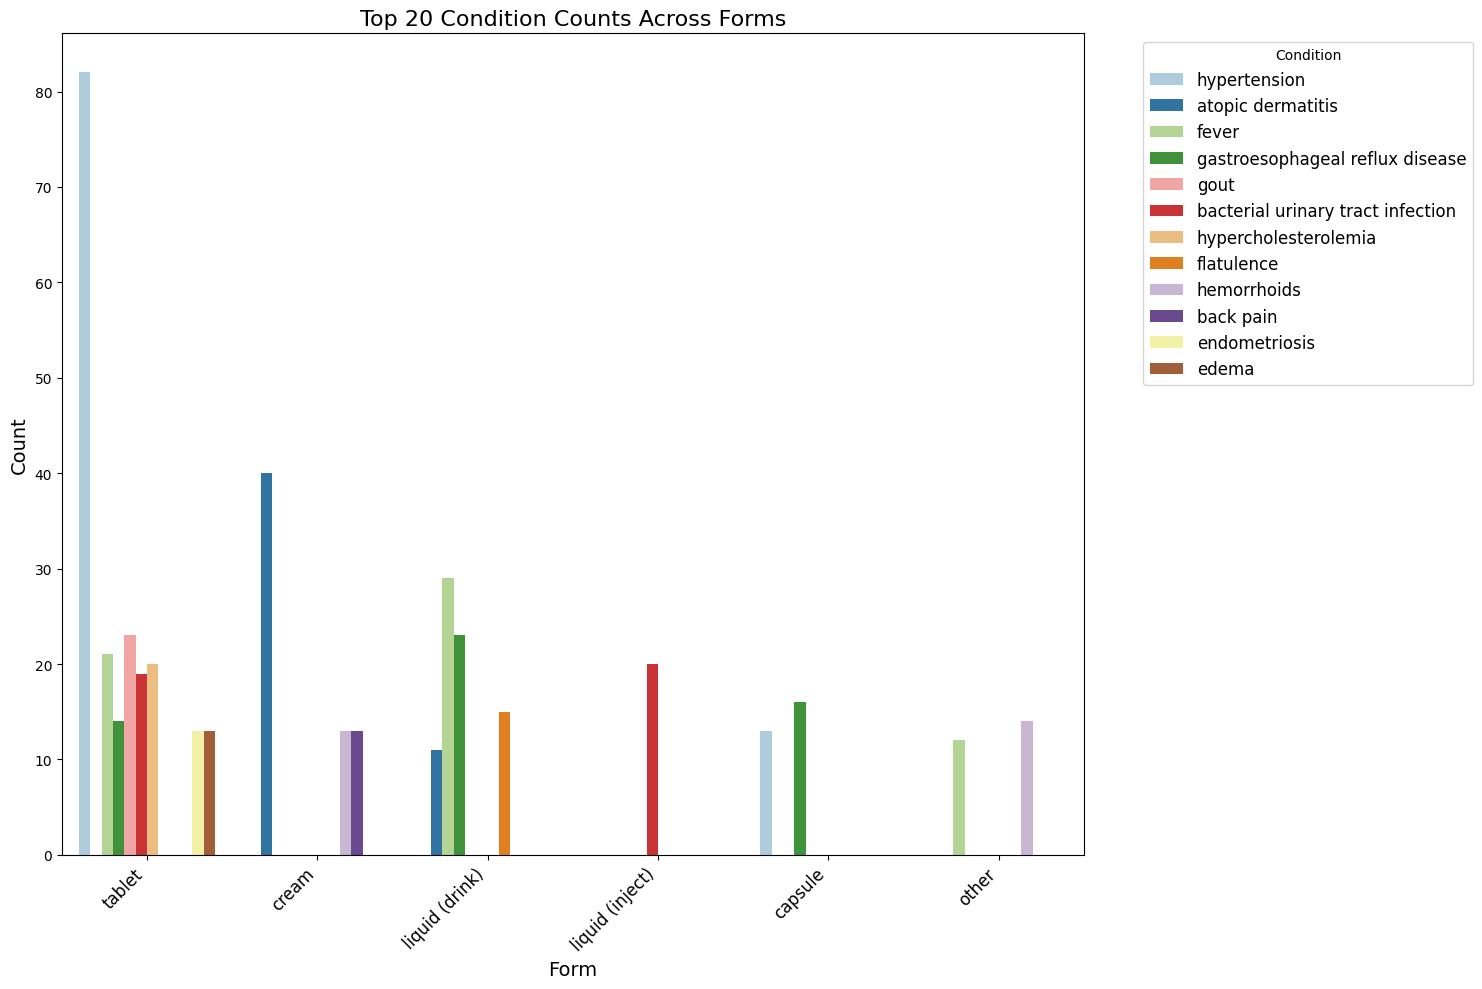

In [ ]:
# Categorical to Categorical: Grouped Bar Chart (Top 20 with Best Colors)

# Make sure the columns have the correct name format
df.columns = df.columns.str.strip()  # Remove any leading or trailing spaces in column names

plt.figure(figsize=(15, 10))

# Group by 'Form' and 'Condition', then sort by 'Count'
cross_tab = df.groupby(['Form', 'Condition']).size().reset_index(name='Count')
top_20 = cross_tab.sort_values(by='Count', ascending=False).head(20)

# Create the grouped bar chart
sns.barplot(
    data=top_20,
    x='Form',
    y='Count',
    hue='Condition',
    palette='Paired'  # Color palette for better visual appeal
)

# Title and labels with correct formatting
plt.title("Top 20 Condition Counts Across Forms", fontsize=16)
plt.xlabel("Form", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotate x-tick labels for readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Place legend outside the plot for clarity
plt.legend(title="Condition", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


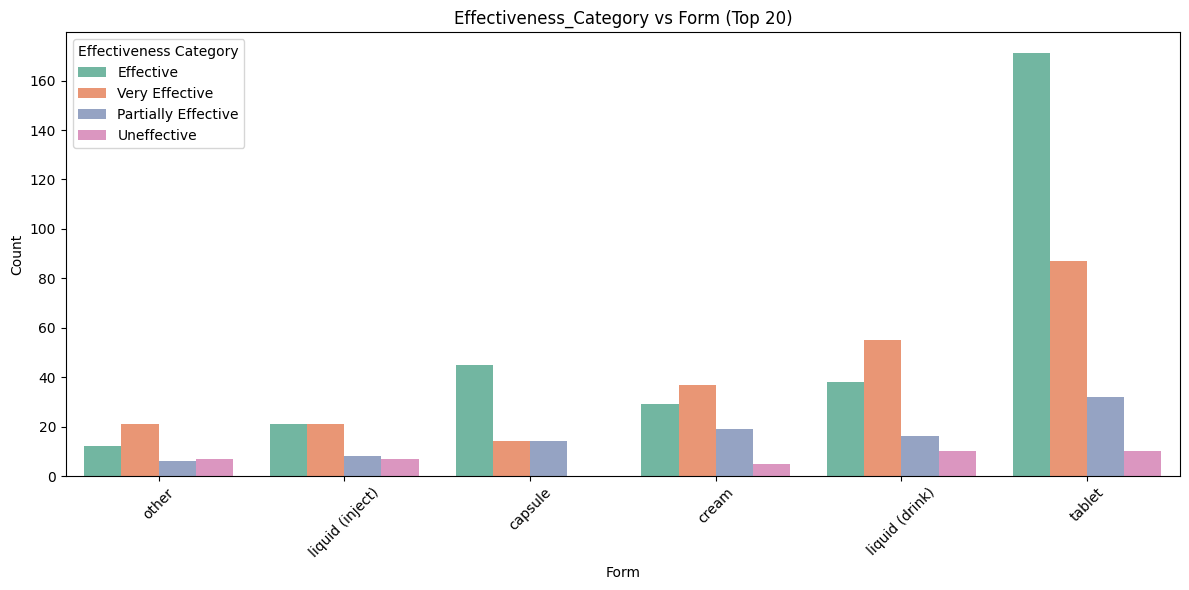

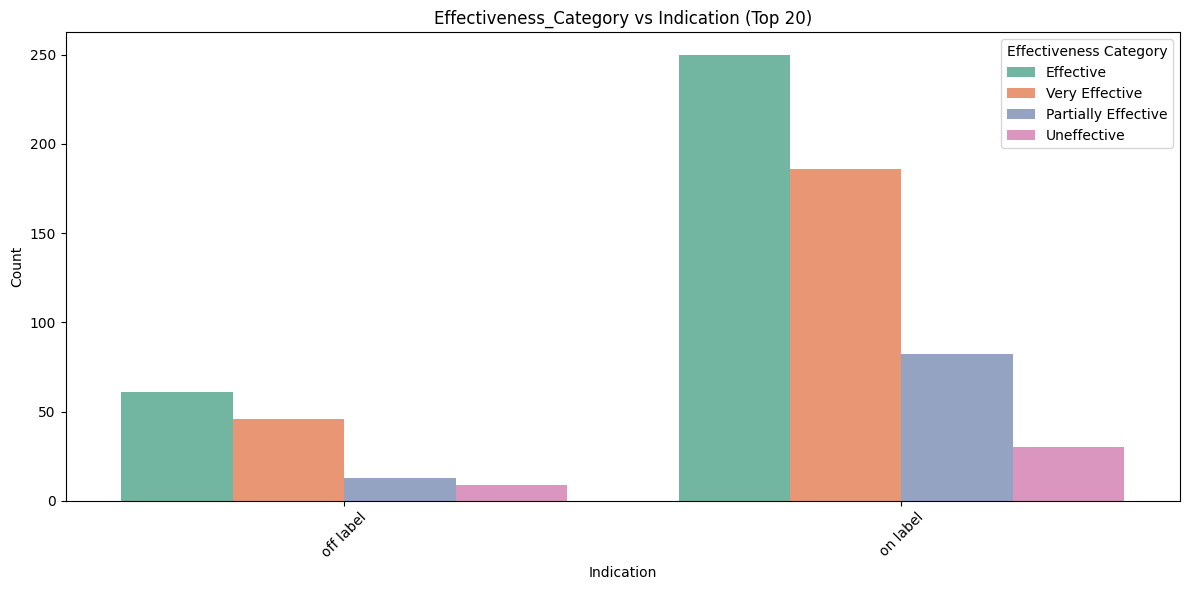

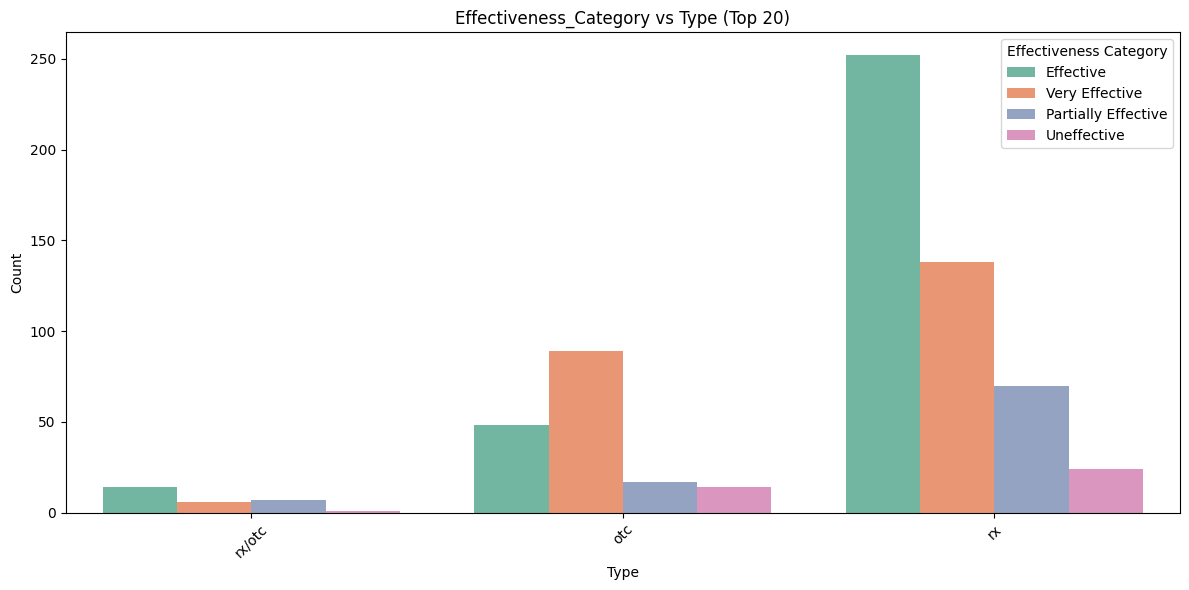

In [ ]:
# Compare Effectiveness_Category against other categorical columns (Top 20 categories)
for column in ['Form', 'Indication', 'Type']:
    # Get the top 20 categories based on their frequency in ascending order
    top_20_categories = df[column].value_counts(ascending=True).head(20).index

    # Filter the DataFrame to include only rows with the top 20 categories
    filtered_df = df[df[column].isin(top_20_categories)]

    plt.figure(figsize=(12, 6))
    sns.countplot(data=filtered_df, x=column, hue='Effectiveness_Category', palette='Set2', order=top_20_categories)
    plt.title(f'Effectiveness_Category vs {column} (Top 20)')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Effectiveness Category')
    plt.tight_layout()
    plt.show()


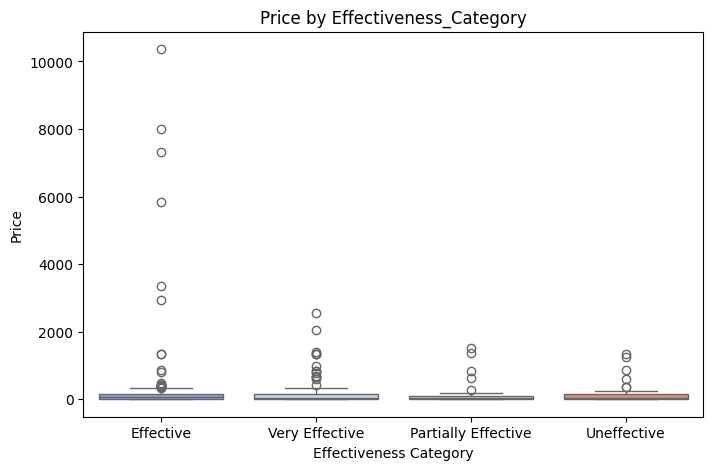

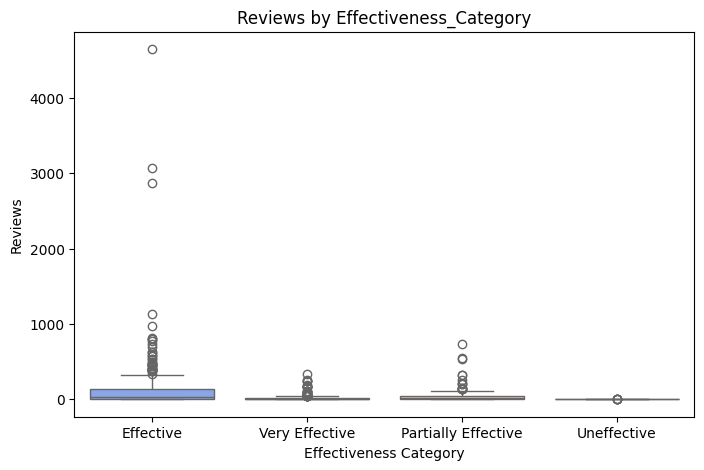

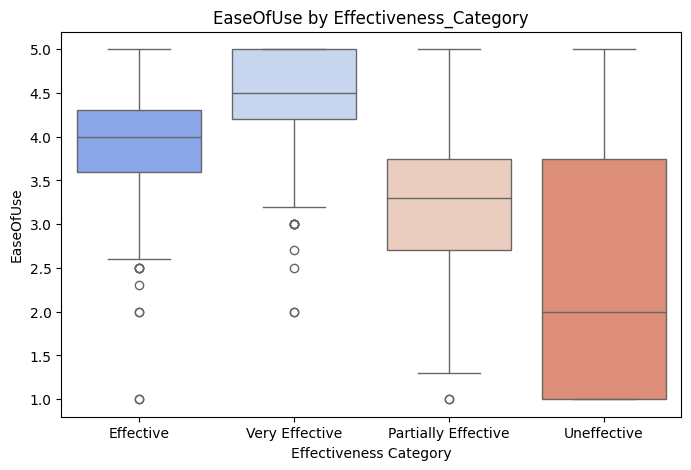

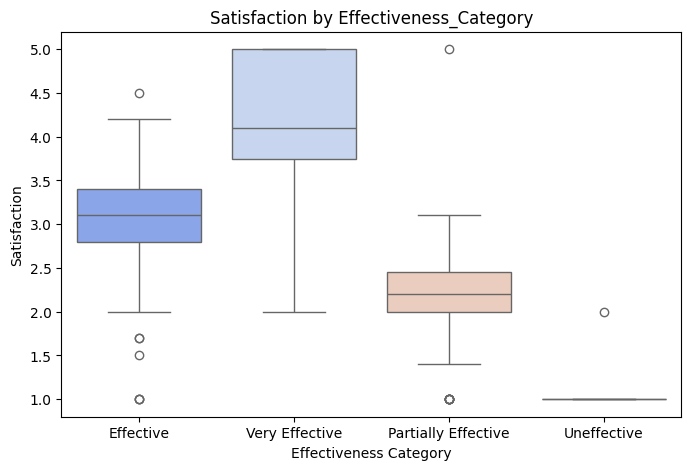

In [ ]:
# Boxplots for numerical features by Effectiveness_Category
numerical_columns = ['Price', 'Reviews', 'EaseOfUse', 'Satisfaction']

for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Effectiveness_Category', y=column, palette='coolwarm')
    plt.title(f'{column} by Effectiveness_Category')
    plt.xlabel('Effectiveness Category')
    plt.ylabel(column)
    plt.show()


In [ ]:
import plotly.express as px

# Create an interactive scatter plot with bubble size and improved color scheme
fig = px.scatter(
    df,
    x='Price',
    y='EaseOfUse',
    color='Effectiveness_Category',  # Color by Effectiveness Category
    color_discrete_sequence=px.colors.qualitative.Set2,  # Use a qualitative color scale for categories
    size='Price',  # Adjust bubble size based on Price (or any other numerical column)
    size_max=30,   # Set maximum bubble size
    title='Price vs EaseOfUse by Effectiveness_Category',
    labels={'Price': 'Price', 'EaseOfUse': 'Ease of Use', 'Effectiveness_Category': 'Effectiveness Category'},
    hover_data=['Condition', 'Drug']  # Add additional info to the hover tooltip
)

# Fine-tune the bubble size appearance
fig.update_traces(marker=dict(sizeref=0.5))  # Adjust sizeref for bubble size scaling

# Customize layout for the legend and title
fig.update_layout(
    legend_title_text='Effectiveness Category',
    legend=dict(
        x=1,                # Position the legend on the right
        y=1,                # Position the legend at the top
        xanchor='left',     # Anchor legend by its left side
        yanchor='top'       # Anchor legend by its top
    ),
    title_x=0.5            # Center the title
)

# Show the plot
fig.show()


### Step 3 Missing  values and outliers handling  

##### As in our dataset we have very least null value which can be negatable so we have added 10% missing values to every column

In [ ]:
import pandas as pd
import numpy as np
""""
# Add 10% random null values to each column
for column in df.columns:
    num_nulls = int(len(df) * 0.1)  # Calculate 10% of the column length
    null_indices = np.random.choice(df.index, size=num_nulls, replace=False)  # Randomly select indices
    df.loc[null_indices, column] = np.nan  # Assign NaN to the selected indices

# Save the modified dataset
df.to_csv('modified_na_drug.csv', index=False)

print("Added 10% random null values to each column. Saved as 'modified_na_drug.csv'.")
"""""

'"\n# Add 10% random null values to each column\nfor column in df.columns:\n    num_nulls = int(len(df) * 0.1)  # Calculate 10% of the column length\n    null_indices = np.random.choice(df.index, size=num_nulls, replace=False)  # Randomly select indices\n    df.loc[null_indices, column] = np.nan  # Assign NaN to the selected indices\n\n# Save the modified dataset\ndf.to_csv(\'modified_na_drug.csv\', index=False)\n\nprint("Added 10% random null values to each column. Saved as \'modified_na_drug.csv\'.")\n'

In [ ]:
data=pd.read_csv('/content/modified_na_drug.csv')
data

,Condition,Drug,EaseOfUse,Effective,Form,Indication,Price,Reviews,Satisfaction,Type,Effectiveness_Category
0,Acute Bacterial Sinusitis,Amoxicillin,3.900,3.700,Capsule,On Label,13.000,86.000,3.200,NaN,Good
1,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.500,3.300,Liquid (Drink),NaN,287.000,43.000,2.600,RX,Good
2,Acute Bacterial Sinusitis,NaN,3.100,3.000,Tablet,On Label,71.000,267.000,2.200,RX,Good
3,Acute Bacterial Sinusitis,Ampicillin,2.000,3.000,NaN,On Label,NaN,1.000,1.000,RX,Good
4,Acute Bacterial Sinusitis,Ampicillin,3.200,NaN,Tablet,On Label,125.000,15.000,3.000,RX,Good
...,...,...,...,...,...,...,...,...,...,...,...
680,vulvovaginal candidiasis,Miconazole Nitrate,3.500,2.800,Cream,On Label,14.000,20.000,NaN,RX/OTC,Average
681,vulvovaginal candidiasis,Miconazole-Skin Clnsr17,4.800,3.000,Cream,On Label,NaN,4.000,3.000,OTC,Good
682,vulvovaginal candidiasis,Miconazole-Skin Clnsr17,4.000,1.000,Other,On Label,126.000,1.000,1.000,OTC,Uneffective
683,vulvovaginal candidiasis,Terconazole,3.500,3.000,Cream,On Label,69.000,20.000,2.700,RX,Good


In [ ]:
data.shape

(685, 11)

In [ ]:
data.isnull().sum()

,0
Condition,68
Drug,68
EaseOfUse,68
Effective,68
Form,68
Indication,75
Price,68
Reviews,68
Satisfaction,68
Type,73


In [ ]:
data=data.drop(['Effectiveness_Category'],axis=1)

In [ ]:
# Function

def lowercase(df):
    for col in df.select_dtypes("O"):
        df[col] = df[col].str.lower()

In [ ]:
lowercase(data)

In [ ]:
display(data[data.duplicated()])
print(f"Number of Rows Duplicated: {len(data[data.duplicated()])}")

,Condition,Drug,EaseOfUse,Effective,Form,Indication,Price,Reviews,Satisfaction,Type


Number of Rows Duplicated: 0


In [ ]:
df_num_col=data.select_dtypes(exclude="object")
df_cat_col=data.select_dtypes(include='object')

In [ ]:
# Iterate over categorical columns
for i in df_cat_col.columns:
    print(df_cat_col[i].value_counts())  # Use df_cat_col instead of df_num_col


Condition
hypertension                                 91
atopic dermatitis                            59
fever                                        58
gastroesophageal reflux disease              51
bacterial urinary tract infection            47
hypercholesterolemia                         28
hemorrhoids                                  27
gout                                         26
pharyngitis due to streptococcus pyogenes    18
diverticulitis of gastrointestinal tract     16
endometriosis                                16
back pain                                    15
flatulence                                   14
depression                                   14
prevention of cerebrovascular accident       14
bacterial conjunctivitis                     13
acute bacterial sinusitis                    13
fibromyalgia                                 12
vertigo                                      11
edema                                        10
vulvovaginal candidiasis      

In [ ]:
df_cat_col['Drug'].value_counts()

,count
Drug,
niacin,7
naproxen sodium,7
hydrocortisone,6
aspirin,5
ibuprofen,5
...,...
clindamycin in 5 % dextrose,1
ampicillin-sulbactam,1
protriptyline,1


In [ ]:
df_num_col

,EaseOfUse,Effective,Price,Reviews,Satisfaction
0,3.900,3.700,13.000,86.000,3.200
1,3.500,3.300,287.000,43.000,2.600
2,3.100,3.000,71.000,267.000,2.200
3,2.000,3.000,NaN,1.000,1.000
4,3.200,NaN,125.000,15.000,3.000
...,...,...,...,...,...
680,3.500,2.800,14.000,20.000,NaN
681,4.800,3.000,NaN,4.000,3.000
682,4.000,1.000,126.000,1.000,1.000
683,3.500,3.000,69.000,20.000,2.700


In [ ]:
df_cat_col

,Condition,Drug,Form,Indication,Type
0,acute bacterial sinusitis,amoxicillin,capsule,on label,NaN
1,acute bacterial sinusitis,amoxicillin-pot clavulanate,liquid (drink),NaN,rx
2,acute bacterial sinusitis,NaN,tablet,on label,rx
3,acute bacterial sinusitis,ampicillin,NaN,on label,rx
4,acute bacterial sinusitis,ampicillin,tablet,on label,rx
...,...,...,...,...,...
680,vulvovaginal candidiasis,miconazole nitrate,cream,on label,rx/otc
681,vulvovaginal candidiasis,miconazole-skin clnsr17,cream,on label,otc
682,vulvovaginal candidiasis,miconazole-skin clnsr17,other,on label,otc
683,vulvovaginal candidiasis,terconazole,cream,on label,rx


In [ ]:
import pandas as pd

# Function to impute missing values using mean, median, or mode
def impute_values(X_train, var):

    # Copy the column to new columns for replaced values
    mean_value = X_train[var].mean()
    median_value = X_train[var].median()
    mode_value = X_train[var].mode()[0]  # Mode returns a Series, take the first value

    # Impute missing values with the computed values for each method
    X_train[var + "_mean"] = X_train[var].fillna(mean_value)
    X_train[var + "_median"] = X_train[var].fillna(median_value)
    X_train[var + "_mode"] = X_train[var].fillna(mode_value)



# Check the column names in the DataFrame (ensure these are correct)
print(df_num_col.columns)

# Apply the imputation for each column
for col in df_num_col.columns:
    impute_values(df_num_col, col)

# Display the modified DataFrame with new columns
print(df_num_col.head())


Index(['EaseOfUse', 'Effective', 'Price', 'Reviews', 'Satisfaction'], dtype='object')
   EaseOfUse  Effective   Price  Reviews  Satisfaction  EaseOfUse_mean  \
0      3.900      3.700  13.000   86.000         3.200           3.900   
1      3.500      3.300 287.000   43.000         2.600           3.500   
2      3.100      3.000  71.000  267.000         2.200           3.100   
3      2.000      3.000     NaN    1.000         1.000           2.000   
4      3.200        NaN 125.000   15.000         3.000           3.200   

   EaseOfUse_median  EaseOfUse_mode  Effective_mean  Effective_median  \
0             3.900           3.900           3.700             3.700   
1             3.500           3.500           3.300             3.300   
2             3.100           3.100           3.000             3.000   
3             2.000           2.000           3.000             3.000   
4             3.200           3.200           3.522             3.600   

   Effective_mode  Price_mean 

In [ ]:
df_num_col.columns

Index(['EaseOfUse', 'Effective', 'Price', 'Reviews', 'Satisfaction',
       'EaseOfUse_mean', 'EaseOfUse_median', 'EaseOfUse_mode',
       'Effective_mean', 'Effective_median', 'Effective_mode', 'Price_mean',
       'Price_median', 'Price_mode', 'Reviews_mean', 'Reviews_median',
       'Reviews_mode', 'Satisfaction_mean', 'Satisfaction_median',
       'Satisfaction_mode'],
      dtype='object')

In [ ]:
# we are going to apply random_sample_imputation technique on some columns which are having null values

def random_sample(X_train, var):
    X_train[var + "_replaced"] = X_train[var].copy()
    s = X_train[var].dropna().sample(X_train[var].isnull().sum(), random_state=42)
    s.index = X_train[X_train[var].isnull()].index
    X_train.loc[X_train[var].isnull(), var + '_replaced'] = s

cols = ['EaseOfUse', 'Effective', 'Price', 'Reviews', 'Satisfaction']

for i in cols:
    random_sample(df_num_col, i)

df_num_col.head()


,EaseOfUse,Effective,Price,Reviews,Satisfaction,EaseOfUse_mean,EaseOfUse_median,EaseOfUse_mode,Effective_mean,Effective_median,...,Reviews_median,Reviews_mode,Satisfaction_mean,Satisfaction_median,Satisfaction_mode,EaseOfUse_replaced,Effective_replaced,Price_replaced,Reviews_replaced,Satisfaction_replaced
0,3.900,3.700,13.000,86.000,3.200,3.900,3.900,3.900,3.700,3.700,...,86.000,86.000,3.200,3.200,3.200,3.900,3.700,13.000,86.000,3.200
1,3.500,3.300,287.000,43.000,2.600,3.500,3.500,3.500,3.300,3.300,...,43.000,43.000,2.600,2.600,2.600,3.500,3.300,287.000,43.000,2.600
2,3.100,3.000,71.000,267.000,2.200,3.100,3.100,3.100,3.000,3.000,...,267.000,267.000,2.200,2.200,2.200,3.100,3.000,71.000,267.000,2.200
3,2.000,3.000,NaN,1.000,1.000,2.000,2.000,2.000,3.000,3.000,...,1.000,1.000,1.000,1.000,1.000,2.000,3.000,205.000,1.000,1.000
4,3.200,NaN,125.000,15.000,3.000,3.200,3.200,3.200,3.522,3.600,...,15.000,15.000,3.000,3.000,3.000,3.200,4.000,125.000,15.000,3.000


In [ ]:
df_num_col.isnull().sum()

,0
EaseOfUse,68
Effective,68
Price,68
Reviews,68
Satisfaction,68
EaseOfUse_mean,0
EaseOfUse_median,0
EaseOfUse_mode,0
Effective_mean,0
Effective_median,0


In [ ]:
df_num_col.columns

Index(['EaseOfUse', 'Effective', 'Price', 'Reviews', 'Satisfaction',
       'EaseOfUse_mean', 'EaseOfUse_median', 'EaseOfUse_mode',
       'Effective_mean', 'Effective_median', 'Effective_mode', 'Price_mean',
       'Price_median', 'Price_mode', 'Reviews_mean', 'Reviews_median',
       'Reviews_mode', 'Satisfaction_mean', 'Satisfaction_median',
       'Satisfaction_mode', 'EaseOfUse_replaced', 'Effective_replaced',
       'Price_replaced', 'Reviews_replaced', 'Satisfaction_replaced'],
      dtype='object')

In [ ]:
len(df_num_col.columns)

25

Std of EaseOfUse Feature : 0.8981914491628056
Std of EaseOfUse_mean Feature : 0.8523760166733031
Std of EaseOfUse_median Feature : 0.8541112574127991
Std of EaseOfUse_mode Feature : 0.9117835805819053
Std of EaseOfUse_replaced Feature : 0.8853617405921987

Std of Effective Feature : 0.949611850189947
Std of Effective_mean Feature : 0.9011735382307753
Std of Effective_median Feature : 0.9014741795629326
Std of Effective_mode Feature : 1.003828693092699
Std of Effective_replaced Feature : 0.9506442358875326

Std of Price Feature : 700.6348901495489
Std of Price_mean Feature : 664.8965288688257
Std of Price_median Feature : 666.0544071076121
Std of Price_mode Feature : 666.7985891275243
Std of Price_replaced Feature : 674.5819991502115

Std of Reviews Feature : 284.05908927190393
Std of Reviews_mean Feature : 269.56965047831824
Std of Reviews_median Feature : 270.47204623161707
Std of Reviews_mode Feature : 270.70516858720185
Std of Reviews_replaced Feature : 272.9574720403611

Std of Sat

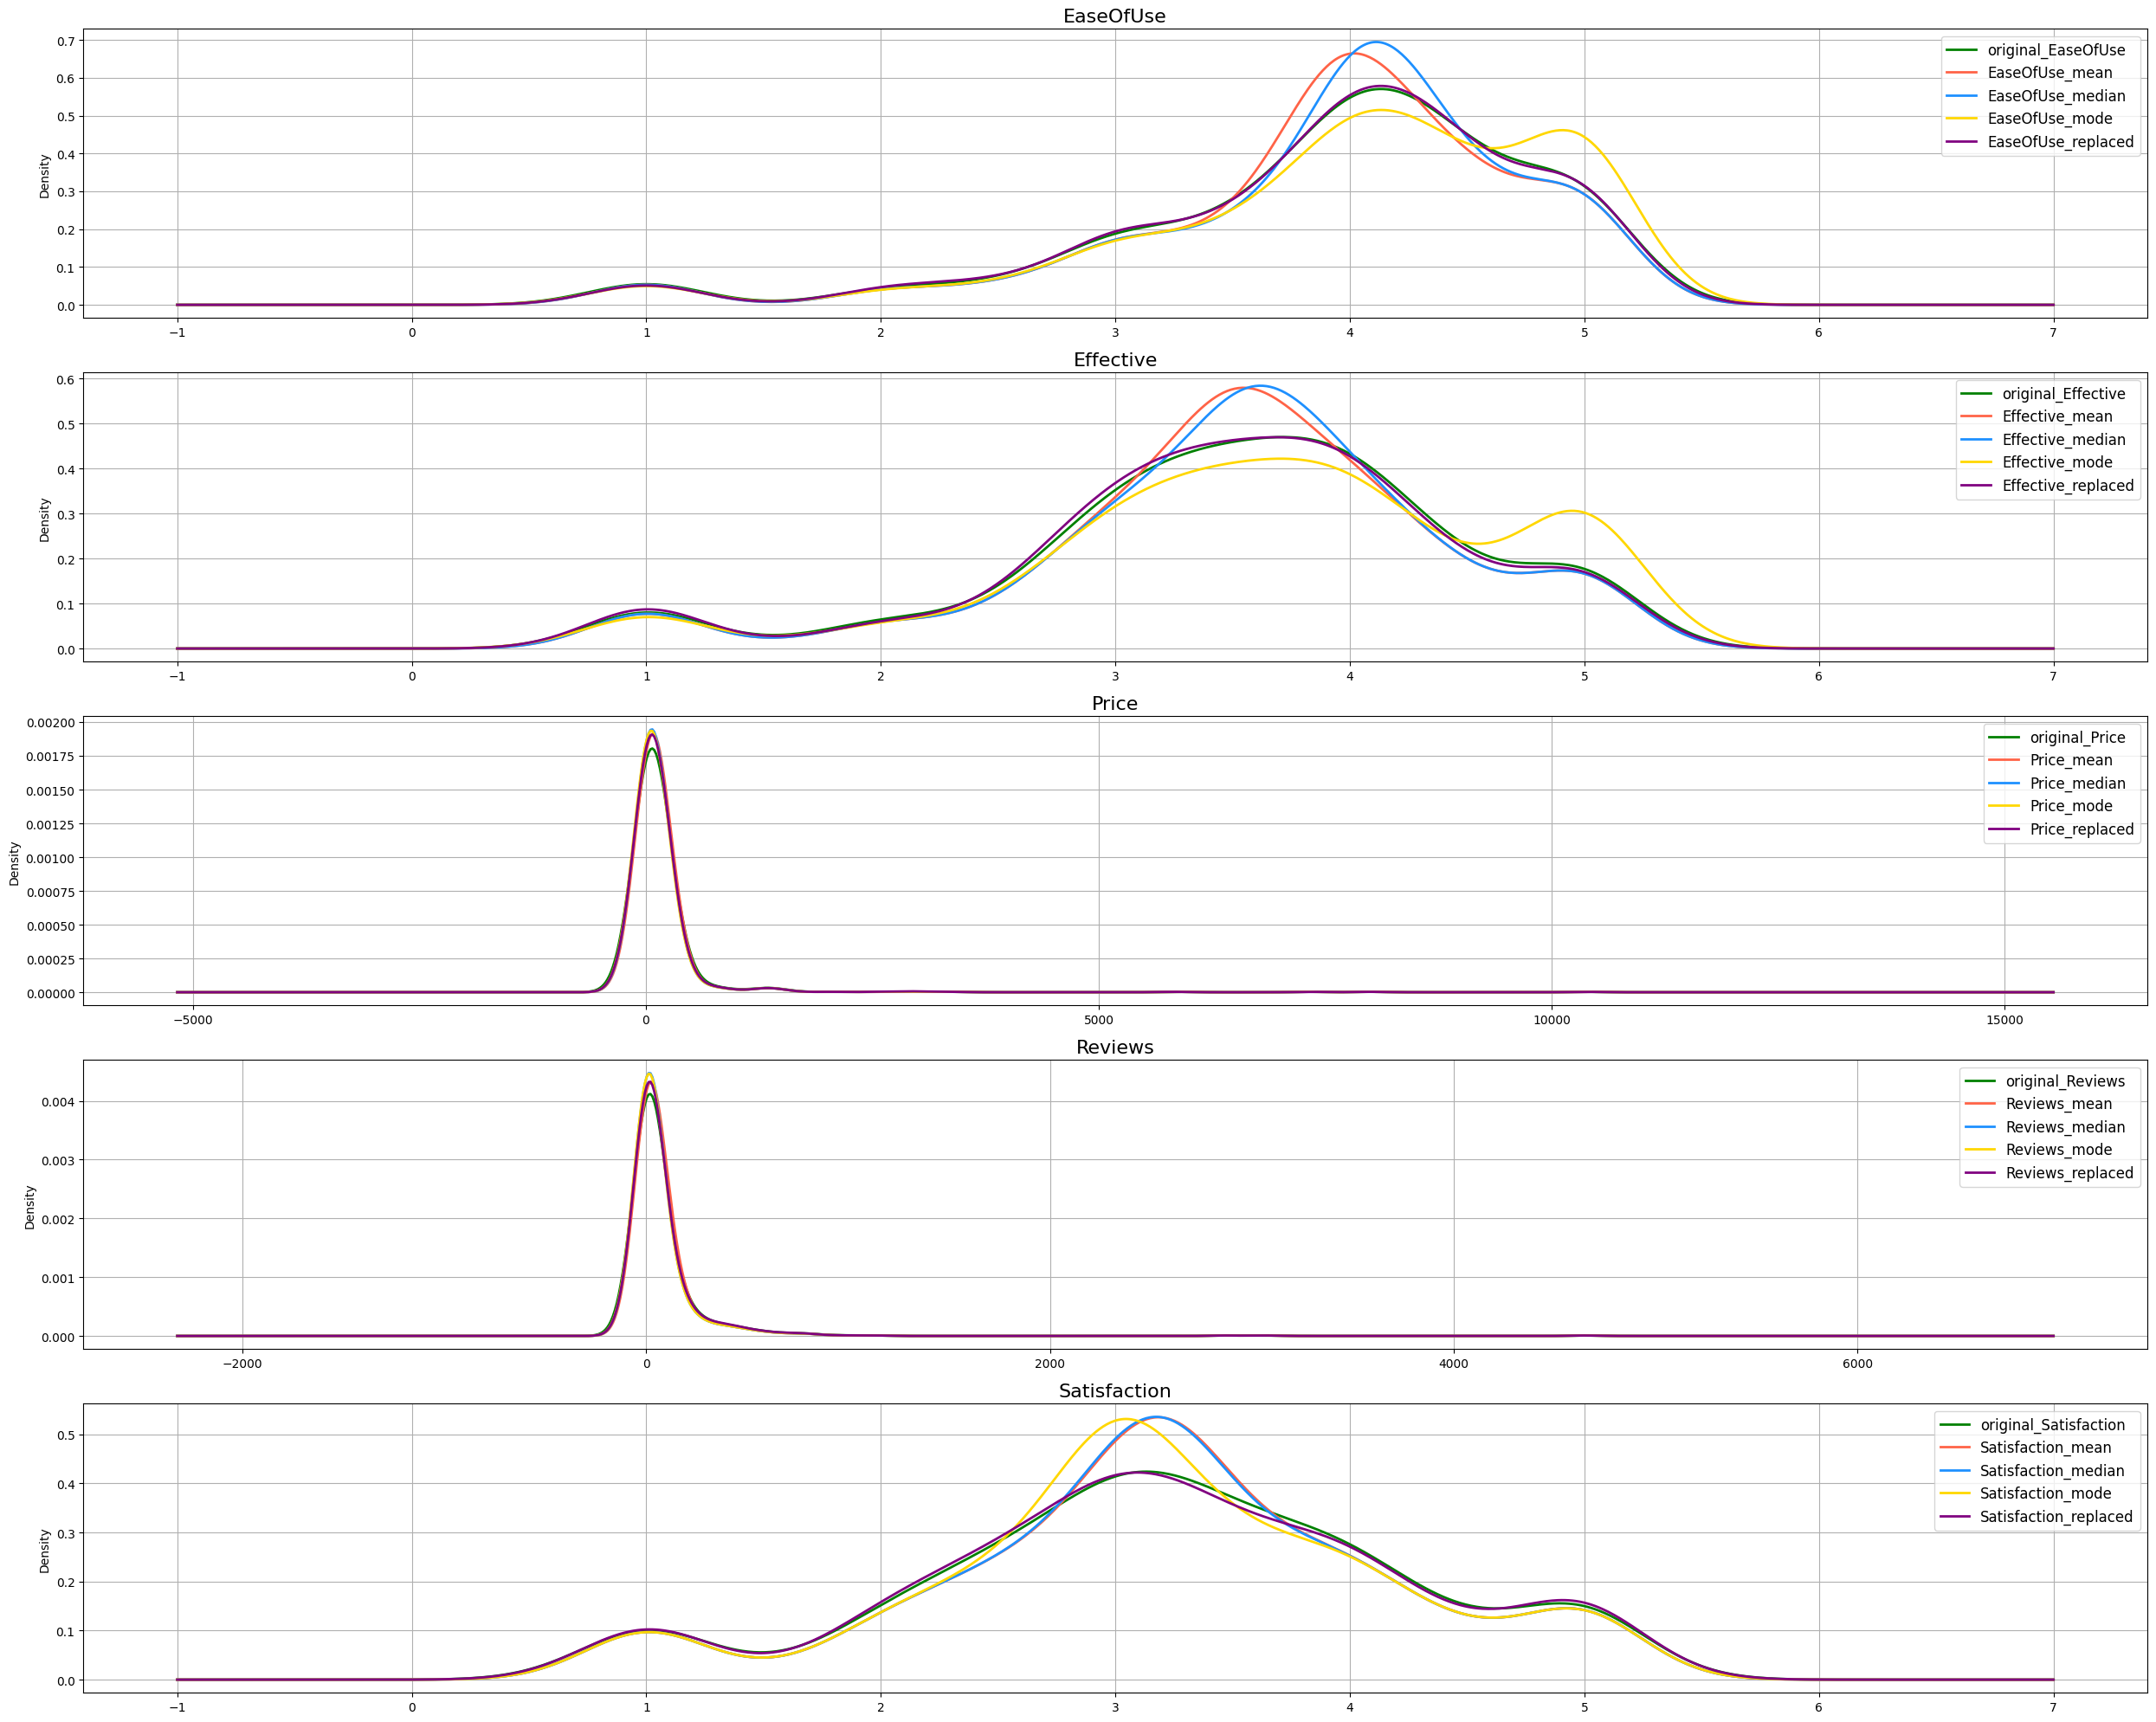

In [ ]:
# Columns to check
cols = ['EaseOfUse', 'Effective', 'Price', 'Reviews', 'Satisfaction']

# Adjust figure size
plt.figure(figsize=(25, 20))  # Increase the figure height for better visibility

# Loop over columns and plot the KDE for each
for i, col in enumerate(cols, 1):
    plt.subplot(5, 1, i)  # 5 rows and 1 column (adjust according to number of columns)
    plt.title(col, fontsize=16)

    # Plot KDE for original data and imputed columns with distinct colors
    df_num_col[col].plot(kind='kde', color='g', label=f'original_{col}', linewidth=2)
    df_num_col[f'{col}_mean'].plot(kind='kde', color='tomato', label=f'{col}_mean', linewidth=2)
    df_num_col[f'{col}_median'].plot(kind='kde', color='dodgerblue', label=f'{col}_median', linewidth=2)
    df_num_col[f'{col}_mode'].plot(kind='kde', color='gold', label=f'{col}_mode', linewidth=2)
    df_num_col[f'{col}_replaced'].plot(kind='kde', color='purple', label=f'{col}_replaced', linewidth=2)

    # Set up the legend and grid
    plt.legend(loc='best', fontsize=12)
    plt.grid(True)

    # Print the standard deviations for reference
    print(f'Std of {col} Feature : {df_num_col[col].std()}')
    print(f'Std of {col}_mean Feature : {df_num_col[f"{col}_mean"].std()}')
    print(f'Std of {col}_median Feature : {df_num_col[f"{col}_median"].std()}')
    print(f'Std of {col}_mode Feature : {df_num_col[f"{col}_mode"].std()}')
    print(f'Std of {col}_replaced Feature : {df_num_col[f"{col}_replaced"].std()}')
    print()

# Adjust layout to ensure no overlap
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
df_num_col=df_num_col.drop(['EaseOfUse', 'Effective', 'Price', 'Reviews', 'Satisfaction',
       'EaseOfUse_mean', 'EaseOfUse_median', 'EaseOfUse_mode',
       'Effective_mean', 'Effective_median', 'Effective_mode', 'Price_mean',
       'Price_median', 'Price_mode', 'Reviews_mean', 'Reviews_median',
       'Reviews_mode', 'Satisfaction_mean', 'Satisfaction_median',
       'Satisfaction_mode'],axis=1)

In [ ]:
df_num_col

,EaseOfUse_replaced,Effective_replaced,Price_replaced,Reviews_replaced,Satisfaction_replaced
0,3.900,3.700,13.000,86.000,3.200
1,3.500,3.300,287.000,43.000,2.600
2,3.100,3.000,71.000,267.000,2.200
3,2.000,3.000,205.000,1.000,1.000
4,3.200,4.000,125.000,15.000,3.000
...,...,...,...,...,...
680,3.500,2.800,14.000,20.000,2.100
681,4.800,3.000,19.000,4.000,3.000
682,4.000,1.000,126.000,1.000,1.000
683,3.500,3.000,69.000,20.000,2.700


In [ ]:
df_num_col['Reviews_replaced'] = df_num_col['Reviews_replaced'].astype(int)

In [ ]:
def fun(data_c,var):
  plt.figure(figsize = (12,3))
  plt.subplot(1,3,1)
  data_c[var].plot(kind='kde')

  plt.subplot(1,3,2)
  sns.boxplot(x = data_c[var])

  plt.subplot(1,3,3)
  stats.probplot(data_c[var],dist='norm',plot = plt)
  plt.show()

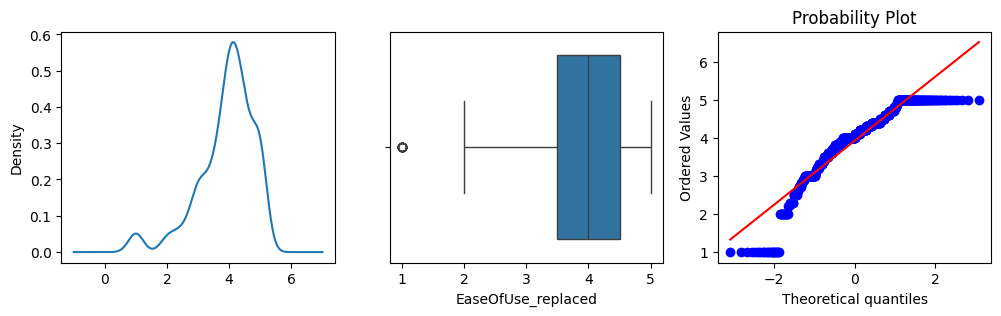

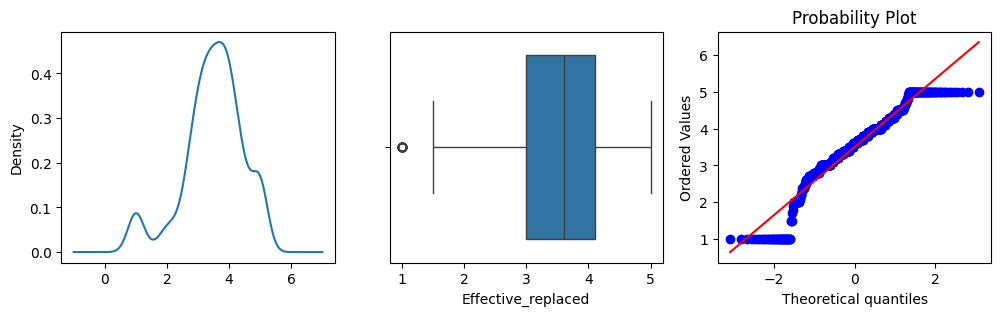

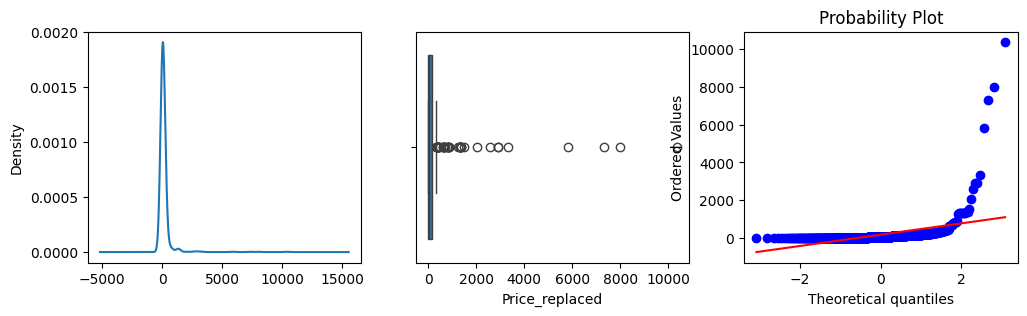

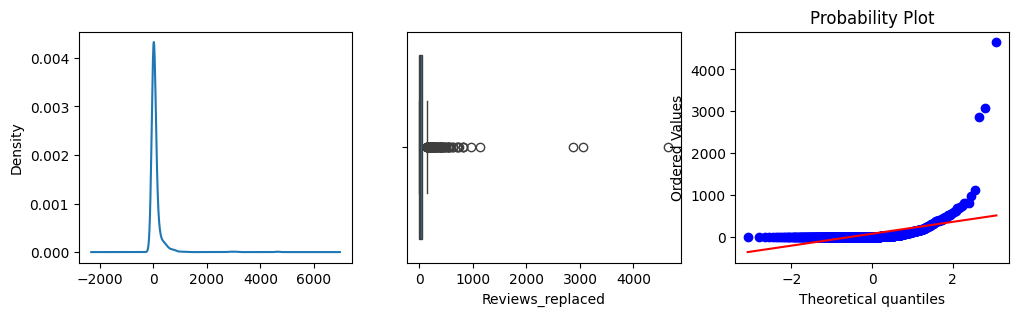

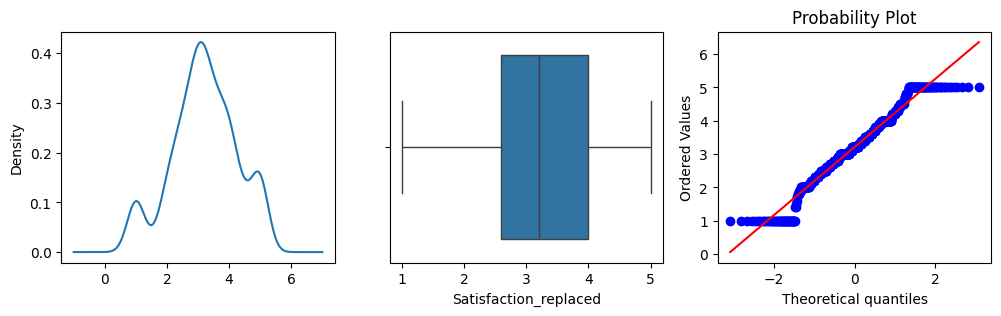

In [ ]:
for i in df_num_col.columns:
  fun(df_num_col,i)

In [ ]:
df_num_col

,EaseOfUse_replaced,Effective_replaced,Price_replaced,Reviews_replaced,Satisfaction_replaced
0,3.900,3.700,13.000,86,3.200
1,3.500,3.300,287.000,43,2.600
2,3.100,3.000,71.000,267,2.200
3,2.000,3.000,205.000,1,1.000
4,3.200,4.000,125.000,15,3.000
...,...,...,...,...,...
680,3.500,2.800,14.000,20,2.100
681,4.800,3.000,19.000,4,3.000
682,4.000,1.000,126.000,1,1.000
683,3.500,3.000,69.000,20,2.700


In [ ]:
from sklearn.preprocessing import StandardScaler

# Define the function 'fun' to apply StandardScaler
for col in df_num_col.columns:
    scaler = StandardScaler()
    df_num_col[col + '_scaled'] = scaler.fit_transform(df_num_col[[col]])


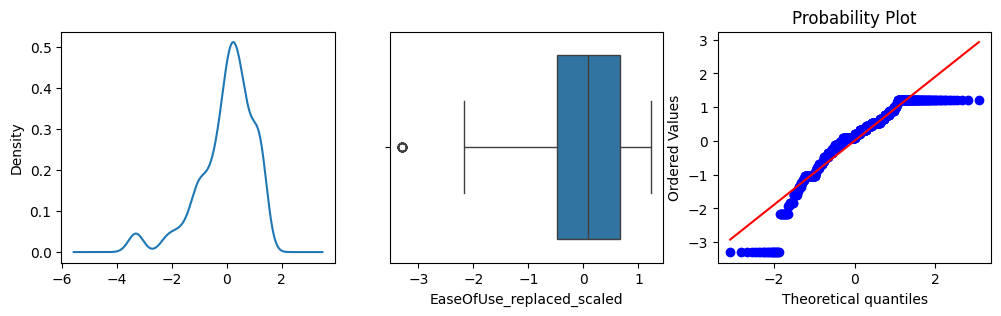

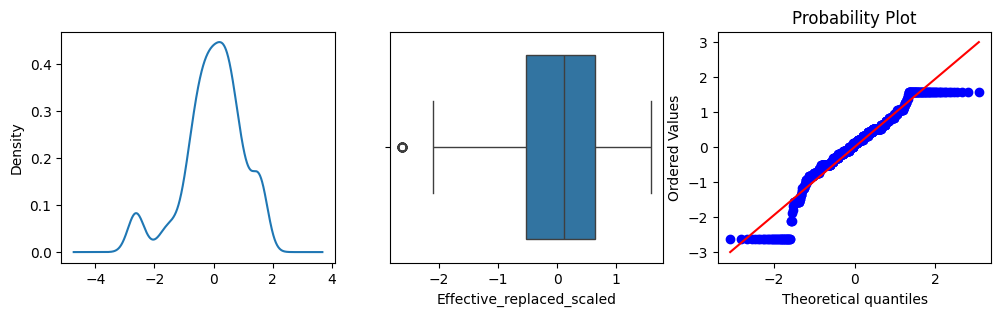

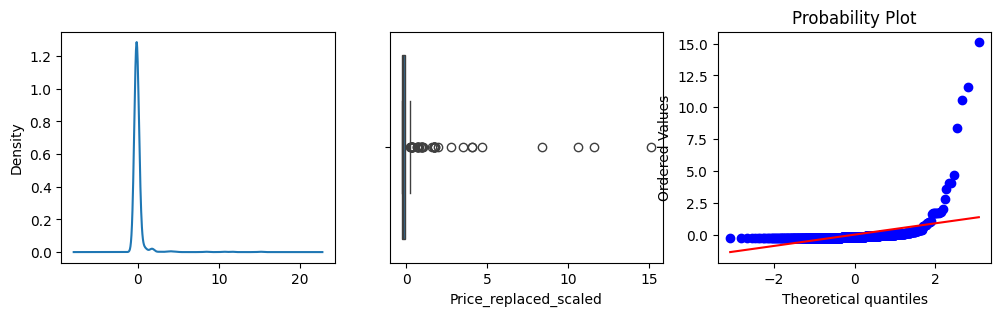

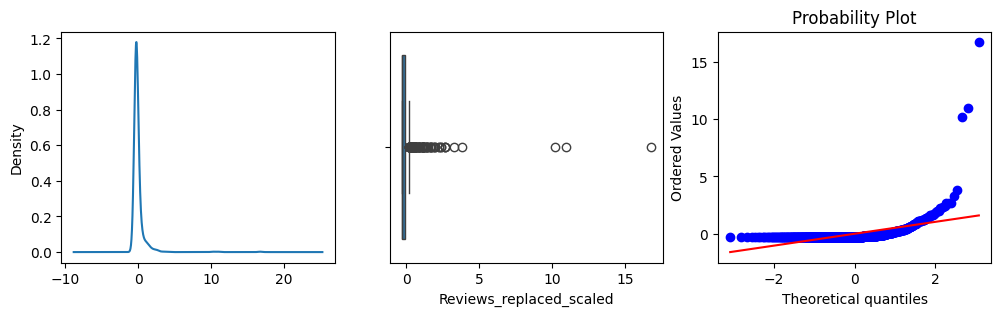

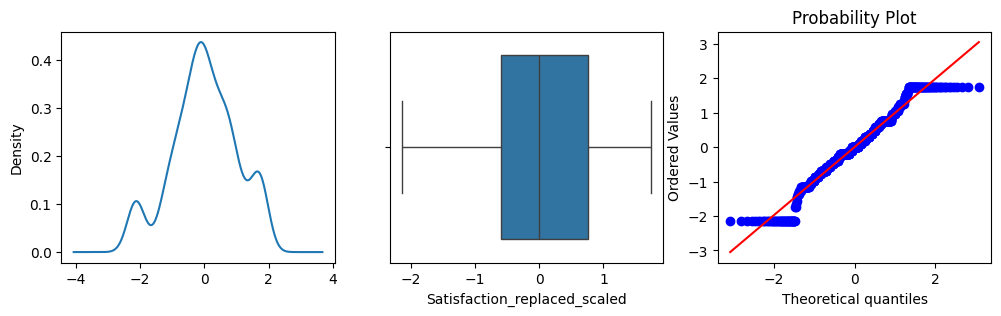

In [ ]:
for i in df_num_col.columns:
  if '_scaled' in i:
    fun(df_num_col,i)

In [ ]:
df_num_col.columns

Index(['EaseOfUse_replaced', 'Effective_replaced', 'Price_replaced',
       'Reviews_replaced', 'Satisfaction_replaced',
       'EaseOfUse_replaced_scaled', 'Effective_replaced_scaled',
       'Price_replaced_scaled', 'Reviews_replaced_scaled',
       'Satisfaction_replaced_scaled'],
      dtype='object')

In [ ]:
df_num_col=df_num_col.drop(['EaseOfUse_replaced_scaled', 'Effective_replaced_scaled',
       'Price_replaced_scaled', 'Reviews_replaced_scaled',
       'Satisfaction_replaced_scaled'],axis=1)

In [ ]:
for i in df_num_col.columns:
  df_num_col[i+'_log'] = np.log(df_num_col[i] + 1)

In [ ]:
df_num_col.columns

Index(['EaseOfUse_replaced', 'Effective_replaced', 'Price_replaced',
       'Reviews_replaced', 'Satisfaction_replaced', 'EaseOfUse_replaced_log',
       'Effective_replaced_log', 'Price_replaced_log', 'Reviews_replaced_log',
       'Satisfaction_replaced_log'],
      dtype='object')

In [ ]:
df_num_col=df_num_col.drop(['EaseOfUse_replaced_log',
       'Effective_replaced_log', 'Price_replaced',
       'Reviews_replaced', 'Satisfaction_replaced_log'],axis=1)

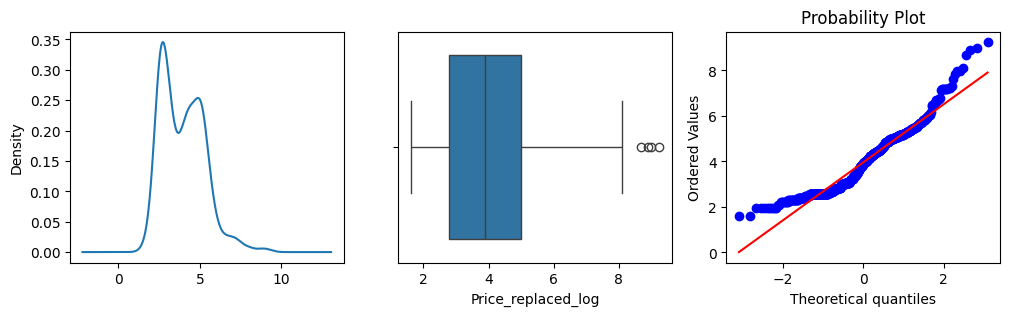

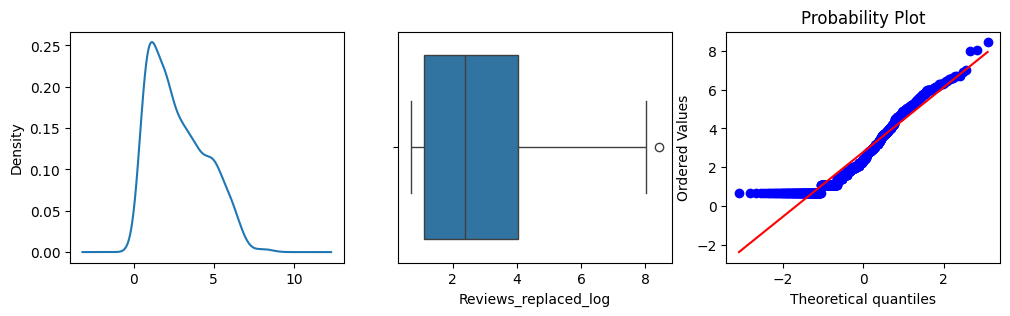

In [ ]:
for i in df_num_col.columns:
  if '_log' in i:
    fun(df_num_col,i)

In [ ]:
df_num_col.columns

Index(['EaseOfUse_replaced', 'Effective_replaced', 'Satisfaction_replaced',
       'Price_replaced_log', 'Reviews_replaced_log'],
      dtype='object')

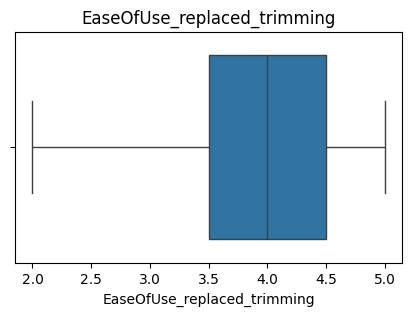

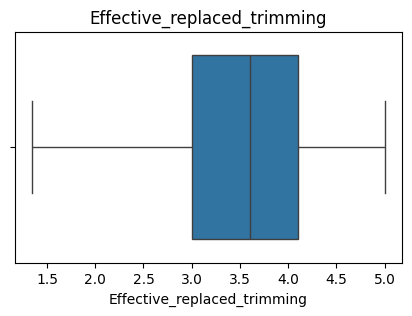

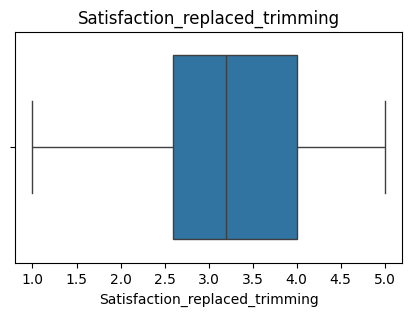

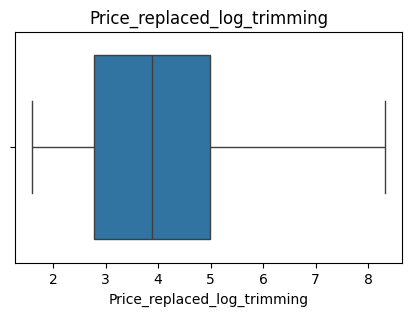

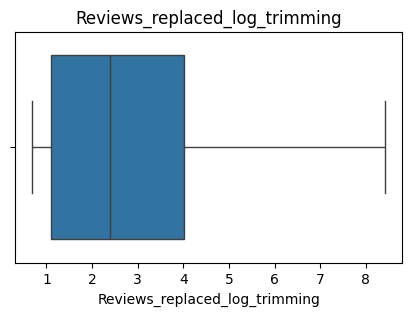

In [ ]:
def boxplot1(var):
  plt.figure(figsize=(5, 3))
  sns.boxplot(x=df_num_col[var])
  plt.title( var)
  plt.show()



for i in df_num_col.columns:
     iqr=df_num_col[i].quantile(0.75)-df_num_col[i].quantile(0.25)
     upper = df_num_col[i].quantile(0.75) + (1.5 * iqr)
     lower = df_num_col[i].quantile(0.25) - (1.5 * iqr)

     df_num_col[f'{i}_trimming']=np.where(df_num_col[i]>upper,upper,
                                                        np.where(df_num_col[i]<lower,lower,df_num_col[i]))

     boxplot1(f"{i}_trimming")

In [ ]:
df_num_col.columns

Index(['EaseOfUse_replaced', 'Effective_replaced', 'Satisfaction_replaced',
       'Price_replaced_log', 'Reviews_replaced_log',
       'EaseOfUse_replaced_trimming', 'Effective_replaced_trimming',
       'Satisfaction_replaced_trimming', 'Price_replaced_log_trimming',
       'Reviews_replaced_log_trimming'],
      dtype='object')

In [ ]:
df_num_col=df_num_col.drop(['EaseOfUse_replaced', 'Effective_replaced', 'Satisfaction_replaced',
       'Price_replaced_log', 'Reviews_replaced_log'],axis=1)

In [ ]:
df_num_col

,EaseOfUse_replaced_trimming,Effective_replaced_trimming,Satisfaction_replaced_trimming,Price_replaced_log_trimming,Reviews_replaced_log_trimming
0,3.900,3.700,3.200,2.639,4.466
1,3.500,3.300,2.600,5.663,3.784
2,3.100,3.000,2.200,4.277,5.591
3,2.000,3.000,1.000,5.328,0.693
4,3.200,4.000,3.000,4.836,2.773
...,...,...,...,...,...
680,3.500,2.800,2.100,2.708,3.045
681,4.800,3.000,3.000,2.996,1.609
682,4.000,1.350,1.000,4.844,0.693
683,3.500,3.000,2.700,4.248,3.045


In [ ]:
# Iterate over categorical columns
for i in df_cat_col.columns:
    print(df_cat_col[i].value_counts())
    print('------------------------------------') # Use df_cat_col instead of df_num_col
    print(len(df_cat_col[i].value_counts()))
    print('--------------------------')


Condition
hypertension                                 91
atopic dermatitis                            59
fever                                        58
gastroesophageal reflux disease              51
bacterial urinary tract infection            47
hypercholesterolemia                         28
hemorrhoids                                  27
gout                                         26
pharyngitis due to streptococcus pyogenes    18
diverticulitis of gastrointestinal tract     16
endometriosis                                16
back pain                                    15
flatulence                                   14
depression                                   14
prevention of cerebrovascular accident       14
bacterial conjunctivitis                     13
acute bacterial sinusitis                    13
fibromyalgia                                 12
vertigo                                      11
edema                                        10
vulvovaginal candidiasis      

In [ ]:
len(df_cat_col['Drug'].value_counts())

431

1.Reason: The most frequent condition (hypertension) is dominant and likely a good substitute for missing values.

2.Drug:
Nature: A wide range of unique drugs (431 categories), with many appearing only once.

Recommended Method: Placeholder Imputation
Reason: Drugs are highly specific and sparse, so filling missing values with the mode or frequency-based sampling would not be meaningful.
Placeholder values like "Unknown Drug" preserve the missingness as a distinct category.

In [ ]:
# Fill null values in categorical columns
df_cat_col['Condition'].fillna(data['Condition'].mode()[0], inplace=True)
df_cat_col['Drug'].fillna('Unknown Drug', inplace=True)
df_cat_col['Form'].fillna(data['Form'].mode()[0], inplace=True)
df_cat_col['Indication'].fillna(data['Indication'].mode()[0], inplace=True)
df_cat_col['Type'].fillna(data['Type'].mode()[0], inplace=True)



In [ ]:
df_cat_col

,Condition,Drug,Form,Indication,Type
0,acute bacterial sinusitis,amoxicillin,capsule,on label,rx
1,acute bacterial sinusitis,amoxicillin-pot clavulanate,liquid (drink),on label,rx
2,acute bacterial sinusitis,Unknown Drug,tablet,on label,rx
3,acute bacterial sinusitis,ampicillin,tablet,on label,rx
4,acute bacterial sinusitis,ampicillin,tablet,on label,rx
...,...,...,...,...,...
680,vulvovaginal candidiasis,miconazole nitrate,cream,on label,rx/otc
681,vulvovaginal candidiasis,miconazole-skin clnsr17,cream,on label,otc
682,vulvovaginal candidiasis,miconazole-skin clnsr17,other,on label,otc
683,vulvovaginal candidiasis,terconazole,cream,on label,rx


In [ ]:
df_cat_col.columns

Index(['Condition', 'Drug', 'Form', 'Indication', 'Type'], dtype='object')

In [ ]:
df_num_col.isnull().sum()

,0
EaseOfUse_replaced_trimming,0
Effective_replaced_trimming,0
Satisfaction_replaced_trimming,0
Price_replaced_log_trimming,0
Reviews_replaced_log_trimming,0


In [ ]:
data_clean=pd.concat([df_cat_col,df_num_col],axis=1)
data_clean

,Condition,Drug,Form,Indication,Type,EaseOfUse_replaced_trimming,Effective_replaced_trimming,Satisfaction_replaced_trimming,Price_replaced_log_trimming,Reviews_replaced_log_trimming
0,acute bacterial sinusitis,amoxicillin,capsule,on label,rx,3.900,3.700,3.200,2.639,4.466
1,acute bacterial sinusitis,amoxicillin-pot clavulanate,liquid (drink),on label,rx,3.500,3.300,2.600,5.663,3.784
2,acute bacterial sinusitis,Unknown Drug,tablet,on label,rx,3.100,3.000,2.200,4.277,5.591
3,acute bacterial sinusitis,ampicillin,tablet,on label,rx,2.000,3.000,1.000,5.328,0.693
4,acute bacterial sinusitis,ampicillin,tablet,on label,rx,3.200,4.000,3.000,4.836,2.773
...,...,...,...,...,...,...,...,...,...,...
680,vulvovaginal candidiasis,miconazole nitrate,cream,on label,rx/otc,3.500,2.800,2.100,2.708,3.045
681,vulvovaginal candidiasis,miconazole-skin clnsr17,cream,on label,otc,4.800,3.000,3.000,2.996,1.609
682,vulvovaginal candidiasis,miconazole-skin clnsr17,other,on label,otc,4.000,1.350,1.000,4.844,0.693
683,vulvovaginal candidiasis,terconazole,cream,on label,rx,3.500,3.000,2.700,4.248,3.045


In [ ]:
data_clean.isnull().sum()

,0
Condition,0
Drug,0
Form,0
Indication,0
Type,0
EaseOfUse_replaced_trimming,0
Effective_replaced_trimming,0
Satisfaction_replaced_trimming,0
Price_replaced_log_trimming,0
Reviews_replaced_log_trimming,0


In [ ]:
data_clean.to_csv('data_clean_na_drug.csv', index=False)

In [ ]:
df_cat_col['Indication']=df_cat_col['Indication'].map({'on label':1,'off label':0})
df_cat_col['Type']=df_cat_col['Type'].map({'rx':1,'rx/otc':2,'otc':3})
df_cat_col['Form']=df_cat_col['Form'].map({'liquid (drink)':1,'tablet':2,'cream':3,'capsule':4,'liquid (inject)':5,'other':6})

In [ ]:
df_cat_col

,Condition,Drug,Form,Indication,Type
0,acute bacterial sinusitis,amoxicillin,4,1,1
1,acute bacterial sinusitis,amoxicillin-pot clavulanate,1,1,1
2,acute bacterial sinusitis,Unknown Drug,2,1,1
3,acute bacterial sinusitis,ampicillin,2,1,1
4,acute bacterial sinusitis,ampicillin,2,1,1
...,...,...,...,...,...
680,vulvovaginal candidiasis,miconazole nitrate,3,1,2
681,vulvovaginal candidiasis,miconazole-skin clnsr17,3,1,3
682,vulvovaginal candidiasis,miconazole-skin clnsr17,6,1,3
683,vulvovaginal candidiasis,terconazole,3,1,1


In [ ]:
fulldata = pd.concat([df_num_col.reset_index(drop=True),
                              df_cat_col.reset_index(drop=True)], axis=1)


fulldata.head(7)

,EaseOfUse_replaced_trimming,Effective_replaced_trimming,Satisfaction_replaced_trimming,Price_replaced_log_trimming,Reviews_replaced_log_trimming,Condition,Drug,Form,Indication,Type
0,3.900,3.700,3.200,2.639,4.466,acute bacterial sinusitis,amoxicillin,4,1,1
1,3.500,3.300,2.600,5.663,3.784,acute bacterial sinusitis,amoxicillin-pot clavulanate,1,1,1
2,3.100,3.000,2.200,4.277,5.591,acute bacterial sinusitis,Unknown Drug,2,1,1
3,2.000,3.000,1.000,5.328,0.693,acute bacterial sinusitis,ampicillin,2,1,1
4,3.200,4.000,3.000,4.836,2.773,acute bacterial sinusitis,ampicillin,2,1,1
5,3.000,3.000,3.000,4.970,0.693,hypertension,ampicillin sodium,2,0,1
6,4.100,3.300,2.800,4.382,6.196,acute bacterial sinusitis,Unknown Drug,2,1,1


1.Condition: Target Encoding

Reason: The Condition column represents 37 categories, with some conditions likely having a direct impact on the target variable (e.g., Effectiveness). Using target encoding helps capture this relationship.


2.Drug: Frequency Encoding

Reason: The Drug column has 431 unique categories, with many appearing only once. Frequency encoding is ideal for handling high-cardinality columns where target encoding could lead to overfitting.


In [ ]:
condition_target_mean = fulldata.groupby('Condition')['Effective_replaced_trimming'].mean()
df_cat_col['Condition_TargetEncoded'] = df_cat_col['Condition'].map(condition_target_mean)

# Frequency Encoding for 'Drug'
drug_freq = fulldata.groupby('Drug')['Effective_replaced_trimming'].mean()
df_cat_col['Drug_TargetEncoded'] = df_cat_col['Drug'].map(drug_freq)

# Display the updated dataset
print(df_cat_col)

                     Condition                         Drug  Form  Indication  \
0    acute bacterial sinusitis                  amoxicillin     4           1   
1    acute bacterial sinusitis  amoxicillin-pot clavulanate     1           1   
2    acute bacterial sinusitis                 Unknown Drug     2           1   
3    acute bacterial sinusitis                   ampicillin     2           1   
4    acute bacterial sinusitis                   ampicillin     2           1   
..                         ...                          ...   ...         ...   
680   vulvovaginal candidiasis           miconazole nitrate     3           1   
681   vulvovaginal candidiasis      miconazole-skin clnsr17     3           1   
682   vulvovaginal candidiasis      miconazole-skin clnsr17     6           1   
683   vulvovaginal candidiasis                  terconazole     3           1   
684   vulvovaginal candidiasis                  tioconazole     6           1   

     Type  Condition_Target

In [ ]:
fulldata

,EaseOfUse_replaced_trimming,Effective_replaced_trimming,Satisfaction_replaced_trimming,Price_replaced_log_trimming,Reviews_replaced_log_trimming,Condition,Drug,Form,Indication,Type
0,3.900,3.700,3.200,2.639,4.466,acute bacterial sinusitis,amoxicillin,4,1,1
1,3.500,3.300,2.600,5.663,3.784,acute bacterial sinusitis,amoxicillin-pot clavulanate,1,1,1
2,3.100,3.000,2.200,4.277,5.591,acute bacterial sinusitis,Unknown Drug,2,1,1
3,2.000,3.000,1.000,5.328,0.693,acute bacterial sinusitis,ampicillin,2,1,1
4,3.200,4.000,3.000,4.836,2.773,acute bacterial sinusitis,ampicillin,2,1,1
...,...,...,...,...,...,...,...,...,...,...
680,3.500,2.800,2.100,2.708,3.045,vulvovaginal candidiasis,miconazole nitrate,3,1,2
681,4.800,3.000,3.000,2.996,1.609,vulvovaginal candidiasis,miconazole-skin clnsr17,3,1,3
682,4.000,1.350,1.000,4.844,0.693,vulvovaginal candidiasis,miconazole-skin clnsr17,6,1,3
683,3.500,3.000,2.700,4.248,3.045,vulvovaginal candidiasis,terconazole,3,1,1


In [ ]:
df_cat_col

,Condition,Drug,Form,Indication,Type,Condition_TargetEncoded,Drug_TargetEncoded
0,acute bacterial sinusitis,amoxicillin,4,1,1,3.215,3.700
1,acute bacterial sinusitis,amoxicillin-pot clavulanate,1,1,1,3.215,3.075
2,acute bacterial sinusitis,Unknown Drug,2,1,1,3.215,3.364
3,acute bacterial sinusitis,ampicillin,2,1,1,3.215,3.250
4,acute bacterial sinusitis,ampicillin,2,1,1,3.215,3.250
...,...,...,...,...,...,...,...
680,vulvovaginal candidiasis,miconazole nitrate,3,1,2,3.325,2.750
681,vulvovaginal candidiasis,miconazole-skin clnsr17,3,1,3,3.325,2.175
682,vulvovaginal candidiasis,miconazole-skin clnsr17,6,1,3,3.325,2.175
683,vulvovaginal candidiasis,terconazole,3,1,1,3.325,3.000


In [ ]:
df_cat_col=df_cat_col.drop(['Condition', 'Drug'],axis=1)

In [ ]:
fulldata = pd.concat([df_num_col.reset_index(drop=True),
                              df_cat_col.reset_index(drop=True)], axis=1)


fulldata.head(7)

,EaseOfUse_replaced_trimming,Effective_replaced_trimming,Satisfaction_replaced_trimming,Price_replaced_log_trimming,Reviews_replaced_log_trimming,Form,Indication,Type,Condition_TargetEncoded,Drug_TargetEncoded
0,3.900,3.700,3.200,2.639,4.466,4,1,1,3.215,3.700
1,3.500,3.300,2.600,5.663,3.784,1,1,1,3.215,3.075
2,3.100,3.000,2.200,4.277,5.591,2,1,1,3.215,3.364
3,2.000,3.000,1.000,5.328,0.693,2,1,1,3.215,3.250
4,3.200,4.000,3.000,4.836,2.773,2,1,1,3.215,3.250
5,3.000,3.000,3.000,4.970,0.693,2,0,1,3.527,3.117
6,4.100,3.300,2.800,4.382,6.196,2,1,1,3.215,3.364


In [ ]:
df_cat_col.columns

Index(['Form', 'Indication', 'Type', 'Condition_TargetEncoded',
       'Drug_TargetEncoded'],
      dtype='object')

In [ ]:
df_cat_col

,Form,Indication,Type,Condition_TargetEncoded,Drug_TargetEncoded
0,4,1,1,3.215,3.700
1,1,1,1,3.215,3.075
2,2,1,1,3.215,3.364
3,2,1,1,3.215,3.250
4,2,1,1,3.215,3.250
...,...,...,...,...,...
680,3,1,2,3.325,2.750
681,3,1,3,3.325,2.175
682,6,1,3,3.325,2.175
683,3,1,1,3.325,3.000


In [ ]:
df_cat_col.Condition_TargetEncoded.unique()

array([3.21538462, 3.52704403, 3.70169492, 3.22307692, 3.10744681,
       3.3       , 3.75      , 3.17777778, 4.05      , 3.25      ,
       3.98      , 4.3       , 4.2       , 3.        , 3.42142857,
       2.940625  , 3.48      , 3.540625  , 3.57241379, 3.575     ,
       3.8       , 3.68921569, 3.225     , 3.76346154, 3.69814815,
       3.925     , 3.56785714, 3.0875    , 4.55      , 2.75      ,
       3.5       , 2.35      , 2.95      , 3.43125   , 3.72727273,
       3.325     ])

In [ ]:
fulldata

,EaseOfUse_replaced_trimming,Effective_replaced_trimming,Satisfaction_replaced_trimming,Price_replaced_log_trimming,Reviews_replaced_log_trimming,Form,Indication,Type,Condition_TargetEncoded,Drug_TargetEncoded
0,3.900,3.700,3.200,2.639,4.466,4,1,1,3.215,3.700
1,3.500,3.300,2.600,5.663,3.784,1,1,1,3.215,3.075
2,3.100,3.000,2.200,4.277,5.591,2,1,1,3.215,3.364
3,2.000,3.000,1.000,5.328,0.693,2,1,1,3.215,3.250
4,3.200,4.000,3.000,4.836,2.773,2,1,1,3.215,3.250
...,...,...,...,...,...,...,...,...,...,...
680,3.500,2.800,2.100,2.708,3.045,3,1,2,3.325,2.750
681,4.800,3.000,3.000,2.996,1.609,3,1,3,3.325,2.175
682,4.000,1.350,1.000,4.844,0.693,6,1,3,3.325,2.175
683,3.500,3.000,2.700,4.248,3.045,3,1,1,3.325,3.000


In [ ]:
fulldata.isnull().sum()

,0
EaseOfUse_replaced_trimming,0
Effective_replaced_trimming,0
Satisfaction_replaced_trimming,0
Price_replaced_log_trimming,0
Reviews_replaced_log_trimming,0
Form,0
Indication,0
Type,0
Condition_TargetEncoded,0
Drug_TargetEncoded,0


In [ ]:
fulldata.isnull().sum()

,0
EaseOfUse_replaced_trimming,0
Effective_replaced_trimming,0
Satisfaction_replaced_trimming,0
Price_replaced_log_trimming,0
Reviews_replaced_log_trimming,0
Form,0
Indication,0
Type,0
Condition_TargetEncoded,0
Drug_TargetEncoded,0


In [ ]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   EaseOfUse_replaced_trimming     685 non-null    float64
 1   Effective_replaced_trimming     685 non-null    float64
 2   Satisfaction_replaced_trimming  685 non-null    float64
 3   Price_replaced_log_trimming     685 non-null    float64
 4   Reviews_replaced_log_trimming   685 non-null    float64
 5   Form                            685 non-null    int64  
 6   Indication                      685 non-null    int64  
 7   Type                            685 non-null    int64  
 8   Condition_TargetEncoded         685 non-null    float64
 9   Drug_TargetEncoded              685 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 53.6 KB


In [ ]:
print(fulldata)

     EaseOfUse_replaced_trimming  Effective_replaced_trimming  \
0                          3.900                        3.700   
1                          3.500                        3.300   
2                          3.100                        3.000   
3                          2.000                        3.000   
4                          3.200                        4.000   
..                           ...                          ...   
680                        3.500                        2.800   
681                        4.800                        3.000   
682                        4.000                        1.350   
683                        3.500                        3.000   
684                        3.900                        2.000   

     Satisfaction_replaced_trimming  Price_replaced_log_trimming  \
0                             3.200                        2.639   
1                             2.600                        5.663   
2              

In [ ]:
X = fulldata.drop(columns=['Effective_replaced_trimming'],axis=1)
y=fulldata['Effective_replaced_trimming']

In [ ]:
X

,EaseOfUse_replaced_trimming,Satisfaction_replaced_trimming,Price_replaced_log_trimming,Reviews_replaced_log_trimming,Form,Indication,Type,Condition_TargetEncoded,Drug_TargetEncoded
0,3.900,3.200,2.639,4.466,4,1,1,3.215,3.700
1,3.500,2.600,5.663,3.784,1,1,1,3.215,3.075
2,3.100,2.200,4.277,5.591,2,1,1,3.215,3.364
3,2.000,1.000,5.328,0.693,2,1,1,3.215,3.250
4,3.200,3.000,4.836,2.773,2,1,1,3.215,3.250
...,...,...,...,...,...,...,...,...,...
680,3.500,2.100,2.708,3.045,3,1,2,3.325,2.750
681,4.800,3.000,2.996,1.609,3,1,3,3.325,2.175
682,4.000,1.000,4.844,0.693,6,1,3,3.325,2.175
683,3.500,2.700,4.248,3.045,3,1,1,3.325,3.000


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
len(X_train), len(y_train)

(548, 548)

In [ ]:
print(X_train)

     EaseOfUse_replaced_trimming  Satisfaction_replaced_trimming  \
550                        4.300                           2.400   
563                        3.500                           4.000   
481                        3.000                           5.000   
208                        4.000                           2.700   
227                        3.200                           2.100   
..                           ...                             ...   
71                         3.300                           2.300   
106                        4.000                           4.000   
270                        4.600                           3.400   
435                        4.700                           4.400   
102                        3.200                           3.000   

     Price_replaced_log_trimming  Reviews_replaced_log_trimming  Form  \
550                        3.664                          0.693     2   
563                        4.564     

In [ ]:
len(X_test),len(y_test)

(137, 137)

In [ ]:
len(fulldata.columns)

10

Linear models

We have output data numeric, considering regression algorithms

Regression Models/Algorithms:

Linear Algorithms (when the data is linear to output (having correlation))

1.Linear Regression
2.Polynomial Regression
3.Lasso & Ridge Regression

Non-Linear Algorithms (when the data is non-linear to output (not having correlation) using classification algorithms)

1.RandomForest Regressor
2.Xgboost Regressor
3.Support Vector Regressor
  etc..
  






In [ ]:
# Algorithm Modules

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

 Modeling - Defining & Training

In [ ]:
# Multiple Linear Regression
mlr = LinearRegression()
# Polynomial Regression
polyfeat = PolynomialFeatures(degree = 2)  # degree is hyperparam
poly = LinearRegression()
# Lasso (L1) & Ridge (L2)
lasso = Lasso(alpha = 5) # alpha - hyperparam - penalty
ridge = Ridge(alpha = 5)
# Random Forest regressor
rf = RandomForestRegressor(n_estimators=50) # n_estimators - hyperparam - number of decision trees
# Support Vector Regressor
svr = SVR(kernel='rbf') # non-linear kernel for non-linear data
# Xgb
xgb = XGBRegressor()
# KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5) # default k_value 5:
# DecisionTreeRegressor
dt = DecisionTreeRegressor()


**Training**

Using xtrain, ytrain data
Using fit method to train the defined model with xtrain, ytrain


**Linear regression**

In [ ]:
# Model Training

mlr.fit(X_train, y_train)

LinearRegression()

In [ ]:

mlr.coef_, mlr.intercept_

(array([ 0.07834593,  0.26490345, -0.01831111,  0.00980792, -0.00656387,
        -0.01117833, -0.05370572,  0.10080117,  0.72376494]),
 -0.38833486434157827)

In [ ]:
# converting x data to poly features

x_train_poly = polyfeat.fit_transform(X_train)

x_test_poly = polyfeat.transform(X_test)

In [ ]:
x_train_poly.shape, x_test_poly.shape

((548, 55), (137, 55))

In [ ]:
# Model Training

poly.fit(X_train, y_train)

LinearRegression()

In [ ]:
# params

poly.coef_, poly.intercept_

(array([ 0.07834593,  0.26490345, -0.01831111,  0.00980792, -0.00656387,
        -0.01117833, -0.05370572,  0.10080117,  0.72376494]),
 -0.38833486434157827)

**Lasso and Ridge**

In [ ]:
# Model Training

lasso.fit(X_train,y_train), ridge.fit(X_train,y_train)

(Lasso(alpha=5), Ridge(alpha=5))

In [ ]:
# Model params

lasso.intercept_, lasso.coef_

(3.5044708029197085, array([ 0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.]))

In [ ]:
ridge.intercept_, ridge.coef_

(-0.34384074908092455,
 array([ 0.08291992,  0.269303  , -0.01679532,  0.01018062, -0.00656974,
        -0.0115037 , -0.05098419,  0.09253495,  0.70713036]))


**Randomforest Regressor**

In [ ]:
# Model Train

rf.fit(X_train, y_train)

# n_estimators is the number of trees hyperparam

RandomForestRegressor(n_estimators=50)

In [ ]:
# Model Params

print("Model Params:")
print(rf.get_params())
print()
print("Columns Importance:")
print()
for i, j in zip(rf.feature_names_in_, rf.feature_importances_):
    print(i+": "+str(round(j,2)))

Model Params:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Columns Importance:

EaseOfUse_replaced_trimming: 0.03
Satisfaction_replaced_trimming: 0.22
Price_replaced_log_trimming: 0.02
Reviews_replaced_log_trimming: 0.02
Form: 0.01
Indication: 0.0
Type: 0.0
Condition_TargetEncoded: 0.02
Drug_TargetEncoded: 0.67


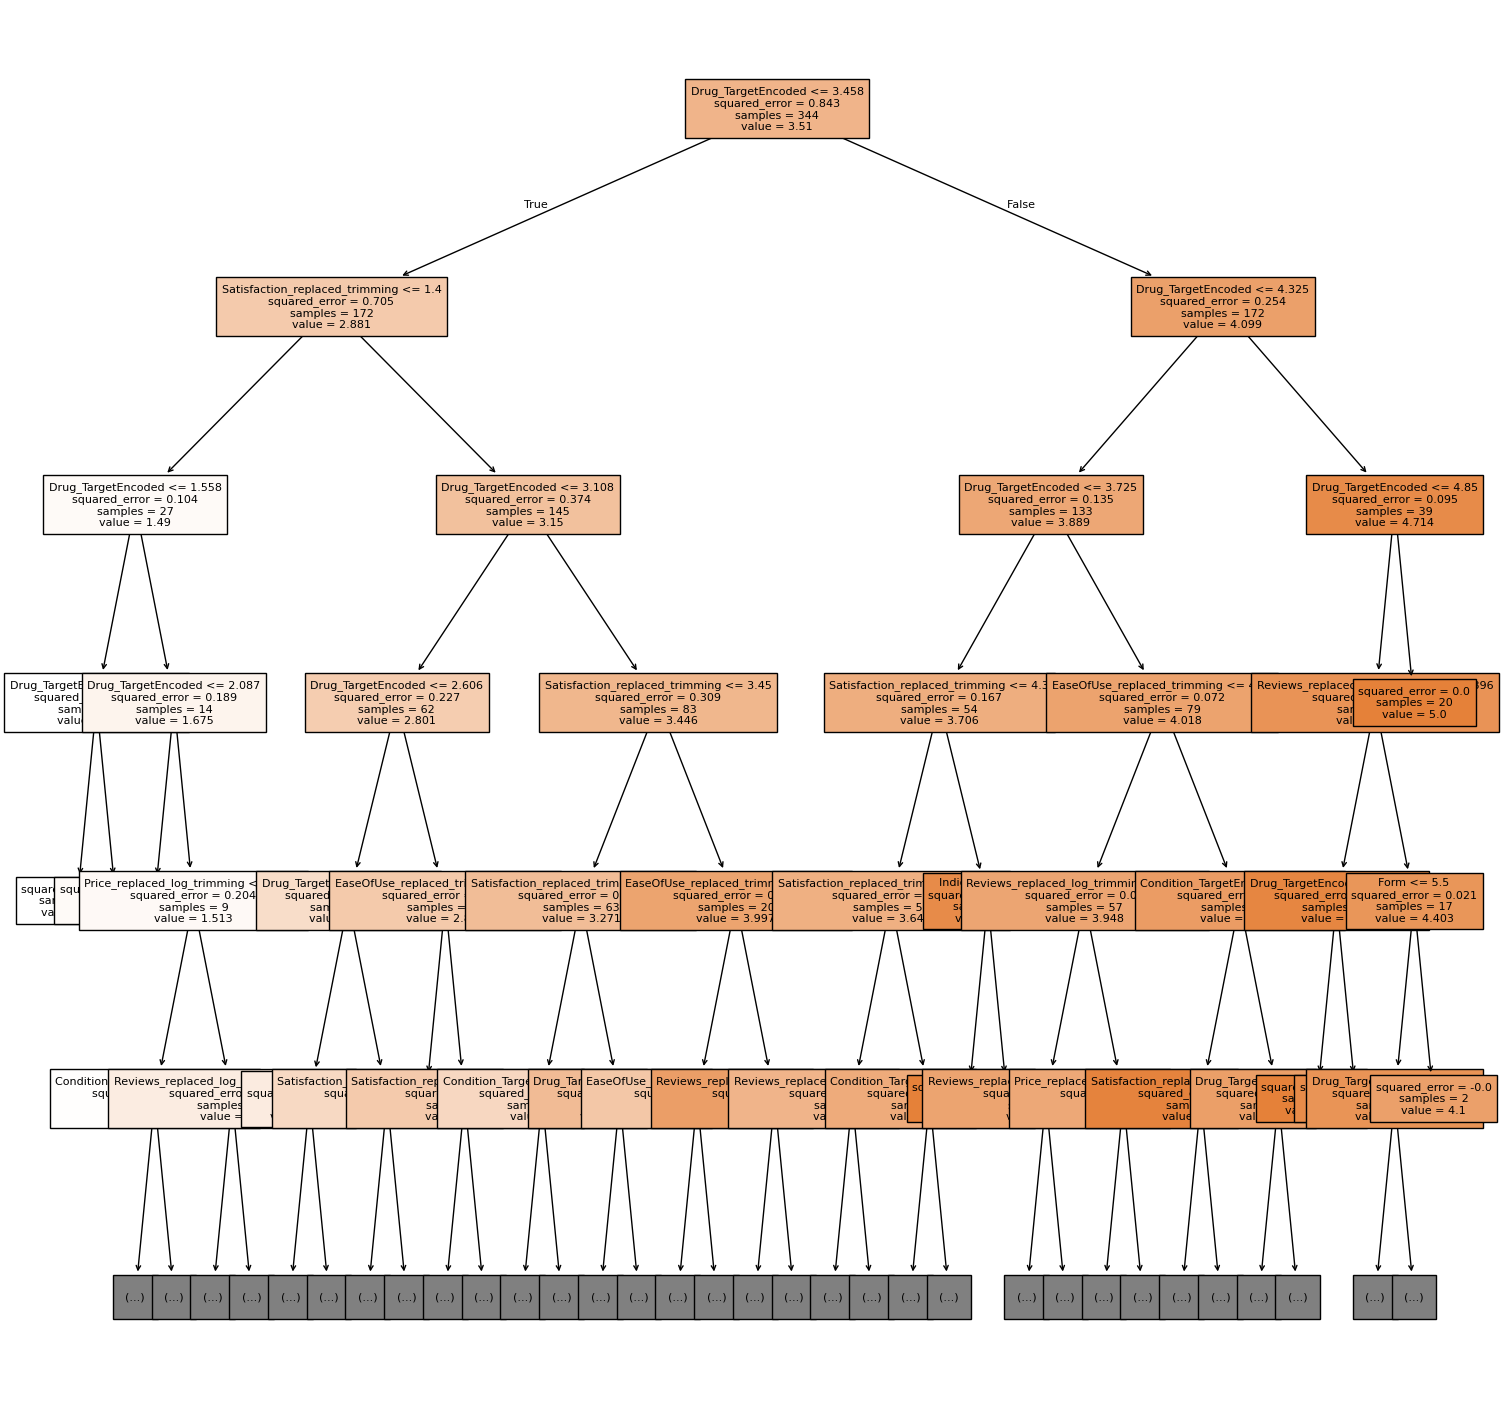

In [ ]:
# Tree Visualization

from sklearn.tree import plot_tree

plt.figure(figsize=(18,18))
plot_tree(rf.estimators_[0],filled=True,fontsize=8,feature_names=X_train.columns,max_depth=5)
plt.show()

**KNeighborsRegressor**


In [ ]:
# Model Train

knn.fit(X_train,y_train)

KNeighborsRegressor()

In [ ]:
# Model Params

print("Model Params:")
print(knn.get_params())


Model Params:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


** DecisionTreeRegressor**

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
# Model Params

print("Model Params:")
print(dt.get_params())

Model Params:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


[link text](https://)**Support Vector Regression**

In [ ]:
svr.fit(X_train, y_train)

SVR()

In [ ]:
# Model Params

print("Model Params:")
print(svr.get_params())

Model Params:
{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


**Xgb Regressor**

In [ ]:
# Model Training

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Model Params

print("Model Params:")
print(xgb.get_params())

Model Params:
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


**Model Evaluation**

In [ ]:
# Libraries

from sklearn.metrics import mean_squared_error, r2_score

Cross-Val Score on Entire Data:

It is to validate the test score given from model by cross checking entire x data with y data
While Training the model in multiple folds , performance metrics will be considered
This can be checked when the data size is huge

In [ ]:
# Sklearn library

from sklearn.model_selection import cross_val_score

In [ ]:
names = ['Multiple Linear Regression', 'Polynomial Regression', 'Lasso Regression',
         'Ridge Regression', 'Random Forest Regressor', 'Support Vector Regressor',
         'XGBoost Regressor', 'KNN Regressor', 'Decision Tree Regressor']

models = {'mlr': mlr, 'poly': poly, 'lasso': lasso, 'ridge': ridge, 'rf': rf,
          'svr': svr, 'xgb': xgb, 'knn': knn, 'dt': dt}

In [ ]:
# Defining empty lists

trainRMSE = []
testRMSE = []

trainscore = []
testscore = []

fit = []

crossvalscore = []

In [ ]:
# Loop through all models
for name, model in models.items():
    if name == 'poly':
        # Polynomial transformation
        pftrain = X_train
        pftest = X_test

        # RMSE and R2 Score
        trainRMSE.append(round(np.sqrt(mean_squared_error(y_train, model.predict(pftrain))), 2))
        testRMSE.append(round(np.sqrt(mean_squared_error(y_test, model.predict(pftest))), 2))
        trainscore.append(round(r2_score(y_train, model.predict(pftrain)), 2))
        testscore.append(round(r2_score(y_test, model.predict(pftest)), 2))
        trscore = r2_score(y_train, model.predict(pftrain))
        tescore = r2_score(y_test, model.predict(pftest))

        # Bias-Variance Trade-off
        if trscore >= 0.60 and tescore >= 0.60:
            if trscore > tescore:
                if trscore - tescore >= 0.10:
                    fit.append("Overfit")
                elif trscore - tescore < 0.10:
                    fit.append("Goodfit")
                else:
                    fit.append("Nofit")
            else:
                fit.append("Nofit")
        elif trscore < 0.60 and tescore < 0.60:
            if abs(trscore) == 0 and abs(tescore) == 0:
                fit.append("Nofit")
            else:
                fit.append("Underfit")
        else:
            fit.append("Nofit")

        # Cross-validation
        scores = cross_val_score(model, X, y, cv=3)
        crossvalscore.append(round(scores.mean(), 2))

    else:
        # RMSE and R2 Score
        trainRMSE.append(round(np.sqrt(mean_squared_error(y_train, model.predict(X_train))), 2))
        testRMSE.append(round(np.sqrt(mean_squared_error(y_test, model.predict(X_test))), 2))
        trainscore.append(round(r2_score(y_train, model.predict(X_train)), 2))
        testscore.append(round(r2_score(y_test, model.predict(X_test)), 2))
        trscore = r2_score(y_train, model.predict(X_train))
        tescore = r2_score(y_test, model.predict(X_test))

        # Bias-Variance Trade-off
        if trscore >= 0.60 and tescore >= 0.60:
            if trscore > tescore:
                if trscore - tescore >= 0.10:
                    fit.append("Overfit")
                elif trscore - tescore < 0.10:
                    fit.append("Goodfit")
                else:
                    fit.append("Nofit")
            else:
                fit.append("Nofit")
        elif trscore < 0.60 and tescore < 0.60:
            if abs(trscore) == 0 and abs(tescore) == 0:
                fit.append("Nofit")
            else:
                fit.append("Underfit")
        else:
            fit.append("Nofit")

        # Cross-validation
        scores = cross_val_score(model, X, y, cv=3)
        crossvalscore.append(round(scores.mean(), 2))

# Print results
print("Train RMSE:", trainRMSE)
print("Test RMSE:", testRMSE)
print("Train R2 Score:", trainscore)
print("Test R2 Score:", testscore)
print("Fit Status:", fit)
print("Cross-Validation Scores:", crossvalscore)


Train RMSE: [0.42, 0.42, 0.91, 0.42, 0.17, 0.4, 0.01, 0.43, 0.0]
Test RMSE: [0.38, 0.38, 0.87, 0.38, 0.38, 0.42, 0.42, 0.48, 0.55]
Train R2 Score: [0.78, 0.78, 0.0, 0.78, 0.97, 0.81, 1.0, 0.78, 1.0]
Test R2 Score: [0.8, 0.8, -0.01, 0.8, 0.8, 0.76, 0.77, 0.69, 0.59]
Fit Status: ['Nofit', 'Nofit', 'Underfit', 'Nofit', 'Overfit', 'Goodfit', 'Overfit', 'Goodfit', 'Nofit']
Cross-Validation Scores: [0.78, 0.78, -0.01, 0.78, 0.77, 0.74, 0.72, 0.63, 0.54]


In [ ]:
# Display Options for Output

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
# Complete Model Evaluation Report

display(pd.DataFrame({'Model':names, 'Trainedmodel':models.values(), 'TrainRMSE':trainRMSE, 'TestRMSE':testRMSE,
             'Trainscore':trainscore, 'Testscore':testscore, 'Crossvalscore':crossvalscore, 'Fit':fit}))

,Model,Trainedmodel,TrainRMSE,TestRMSE,Trainscore,Testscore,Crossvalscore,Fit
0,Multiple Linear Regression,LinearRegression(),0.420,0.380,0.780,0.800,0.780,Nofit
1,Polynomial Regression,LinearRegression(),0.420,0.380,0.780,0.800,0.780,Nofit
2,Lasso Regression,Lasso(alpha=5),0.910,0.870,0.000,-0.010,-0.010,Underfit
3,Ridge Regression,Ridge(alpha=5),0.420,0.380,0.780,0.800,0.780,Nofit
4,Random Forest Regressor,"(DecisionTreeRegressor(max_features=1.0, rando...",0.170,0.380,0.970,0.800,0.770,Overfit
5,Support Vector Regressor,SVR(),0.400,0.420,0.810,0.760,0.740,Goodfit
6,XGBoost Regressor,"XGBRegressor(base_score=None, booster=None, ca...",0.010,0.420,1.000,0.770,0.720,Overfit
7,KNN Regressor,KNeighborsRegressor(),0.430,0.480,0.780,0.690,0.630,Goodfit
8,Decision Tree Regressor,DecisionTreeRegressor(),0.000,0.550,1.000,0.590,0.540,Nofit


Better Perfomance Model

From the above table we can see that Support Vector Regressor  Giving better test score (0.76) and less test loss (0.42)  and Random Forest Regressor		Giving better test score (0.80) and less test loss (0.38) compared to other

In [ ]:
# Parameter grid for RandomForestRegressor
param_grid_rf = {
    'n_estimators': [50,100,150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor()

# Set up GridSearchCV for RandomForestRegressor
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1
)
grid_search_rf.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_rf = grid_search_rf.best_estimator_

# Initialize lists for metrics
trainRMSE = []
testRMSE = []
trainscore = []
testscore = []
fit = []
crossvalscore = []

# Calculate metrics for the best RandomForestRegressor model
train_rmse = round(np.sqrt(mean_squared_error(y_train, best_rf.predict(X_train))), 2)
test_rmse = round(np.sqrt(mean_squared_error(y_test, best_rf.predict(X_test))), 2)
train_r2 = round(r2_score(y_train, best_rf.predict(X_train)), 2)
test_r2 = round(r2_score(y_test, best_rf.predict(X_test)), 2)

# Append metrics
trainRMSE.append(train_rmse)
testRMSE.append(test_rmse)
trainscore.append(train_r2)
testscore.append(test_r2)

# Evaluate bias-variance trade-off
if train_r2 >= 0.60 and test_r2 >= 0.60:
    if train_r2 - test_r2 >= 0.10:
        fit.append("Overfit")
    elif train_r2 - test_r2 < 0.10:
        fit.append("Goodfit")
    else:
        fit.append("Nofit")
elif train_r2 < 0.60 and test_r2 < 0.60:
    fit.append("Underfit")
else:
    fit.append("Nofit")

# Cross-validation score
scores = cross_val_score(best_rf, X, y, cv=3, scoring='r2')
crossvalscore.append(round(scores.mean(), 2))

# Print results
print("Best Parameters:", grid_search_rf.best_params_)
print("Train RMSE:", trainRMSE)
print("Test RMSE:", testRMSE)
print("Train R2 Score:", trainscore)
print("Test R2 Score:", testscore)
print("Fit Status:", fit)
print("Cross-Validation Scores:", crossvalscore)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Train RMSE: [0.3]
Test RMSE: [0.38]
Train R2 Score: [0.89]
Test R2 Score: [0.81]
Fit Status: ['Goodfit']
Cross-Validation Scores: [0.79]


In [ ]:
# Parameter grid for XGBRegressor
param_grid_xgb = {
    'n_estimators': [50,100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBRegressor model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up GridSearchCV for XGBRegressor
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1
)
grid_search_xgb.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_xgb = grid_search_xgb.best_estimator_

# Initialize lists for metrics
trainRMSE = []
testRMSE = []
trainscore = []
testscore = []
fit = []
crossvalscore = []

# Calculate metrics for the best XGBRegressor model
train_rmse = round(np.sqrt(mean_squared_error(y_train, best_xgb.predict(X_train))), 2)
test_rmse = round(np.sqrt(mean_squared_error(y_test, best_xgb.predict(X_test))), 2)
train_r2 = round(r2_score(y_train, best_xgb.predict(X_train)), 2)
test_r2 = round(r2_score(y_test, best_xgb.predict(X_test)), 2)

# Append metrics
trainRMSE.append(train_rmse)
testRMSE.append(test_rmse)
trainscore.append(train_r2)
testscore.append(test_r2)

# Evaluate bias-variance trade-off
if train_r2 >= 0.60 and test_r2 >= 0.60:
    if train_r2 - test_r2 >= 0.10:
        fit.append("Overfit")
    elif train_r2 - test_r2 < 0.10:
        fit.append("Goodfit")
    else:
        fit.append("Nofit")
elif train_r2 < 0.60 and test_r2 < 0.60:
    fit.append("Underfit")
else:
    fit.append("Nofit")

# Cross-validation score
scores = cross_val_score(best_xgb, X, y, cv=3, scoring='r2')
crossvalscore.append(round(scores.mean(), 2))

# Print results
print("Best Parameters:", grid_search_xgb.best_params_)
print("Train RMSE:", trainRMSE)
print("Test RMSE:", testRMSE)
print("Train R2 Score:", trainscore)
print("Test R2 Score:", testscore)
print("Fit Status:", fit)
print("Cross-Validation Scores:", crossvalscore)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Train RMSE: [0.33]
Test RMSE: [0.38]
Train R2 Score: [0.87]
Test R2 Score: [0.81]
Fit Status: ['Goodfit']
Cross-Validation Scores: [0.79]


In [ ]:
# Parameter grid for DecisionTreeRegressor
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the DecisionTreeRegressor model
dt_model = DecisionTreeRegressor()

# Set up GridSearchCV for DecisionTreeRegressor
grid_search_dt = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid_dt,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1
)
grid_search_dt.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_dt = grid_search_dt.best_estimator_

# Initialize lists for metrics
trainRMSE = []
testRMSE = []
trainscore = []
testscore = []
fit = []
crossvalscore = []

# Calculate metrics for the best DecisionTreeRegressor model
train_rmse = round(np.sqrt(mean_squared_error(y_train, best_dt.predict(X_train))), 2)
test_rmse = round(np.sqrt(mean_squared_error(y_test, best_dt.predict(X_test))), 2)
train_r2 = round(r2_score(y_train, best_dt.predict(X_train)), 2)
test_r2 = round(r2_score(y_test, best_dt.predict(X_test)), 2)

# Append metrics
trainRMSE.append(train_rmse)
testRMSE.append(test_rmse)
trainscore.append(train_r2)
testscore.append(test_r2)

# Evaluate bias-variance trade-off
if train_r2 >= 0.60 and test_r2 >= 0.60:
    if train_r2 - test_r2 >= 0.10:
        fit.append("Overfit")
    elif train_r2 - test_r2 < 0.10:
        fit.append("Goodfit")
    else:
        fit.append("Nofit")
elif train_r2 < 0.60 and test_r2 < 0.60:
    fit.append("Underfit")
else:
    fit.append("Nofit")

# Cross-validation score
scores = cross_val_score(best_dt, X, y, cv=3, scoring='r2')
crossvalscore.append(round(scores.mean(), 2))

# Print results
print("Best Parameters:", grid_search_dt.best_params_)
print("Train RMSE:", trainRMSE)
print("Test RMSE:", testRMSE)
print("Train R2 Score:", trainscore)
print("Test R2 Score:", testscore)
print("Fit Status:", fit)
print("Cross-Validation Scores:", crossvalscore)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Train RMSE: [0.28]
Test RMSE: [0.47]
Train R2 Score: [0.91]
Test R2 Score: [0.71]
Fit Status: ['Overfit']
Cross-Validation Scores: [0.73]


In [ ]:
import pickle

In [ ]:
with open('Healthcare_regression.pkl','wb')as f:
  pickle.dump(best_rf,f)

In [ ]:
with open('Healthcare_regression.pkl','wb')as f:
  pickle.dump(best_xgb,f)